## Project 2 - Kaggle Challenges with Titanic Survival - Classification, and House Prices - Regression

## Part 2: Machine Learning from Disaster

_Team numbers: 10_

_Team members: Maha Aldosary - Noha Zamaan - Mariah Alshiekh(leader)_

---

### Contents:
- [Problem Statment](#Problem-Statment)
- [Kaggle Linke](#Kaggle-Link)
- [Load Required Packages](#Load-Required-Packages)
- [Data Import and Description](#Data-Import-and-Description)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualization](#Data-Visualization)
- [Modelling](#Modelling)
- [Conclusion](#Conclusion)

### Problem Statment:
 “what sorts of people were more likely to survive?”
##### Does it require a classification, regression or clustering based solution?
Titanic data has verity of features that describe the satuation in titanic ship. most of these features have object type. 
So, classification model works perfectly with these data and we applied multiable kind of classfication model in order to select the model that provide best score.

---

### Kaggle Link
We Worked on three strategies :

1- First stratiges : Fill missing value with (mean and mod) method [here](https://www.kaggle.com/mariahalshiekh/project-taitanic)

2- Second stratiges: Fill missing value using Random Foreset [here](https://www.kaggle.com/mariahalshiekh/project-titanic-rf-clean)

3- Third stratiges : Fill missing value using Knn classifier [here](https://www.kaggle.com/mariahalshiekh/project-taitanic-knn-clean)

### Load Required Packages

In [160]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set_style('whitegrid') # just optional!
%matplotlib inline
#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

### Data Import and Description|

[train_data: ](https://www.kaggle.com/c/titanic/data?select=train.csv)will contain the details of a subset of the passengers and importantly, will reveal whether they survived or not, also known as the “ground truth”.

[test_data:](https://www.kaggle.com/c/titanic/data?select=test.csv) dataset contains similar information but does not disclose the “ground truth” for each passenger. 

In [161]:
#read train and test datsets assign them to appropriately named pandas dataframes. 
train_data=pd.read_csv('./train.csv')
test_data=pd.read_csv('./test.csv')
sample_data=pd.read_csv('./gender_submission.csv')

#### Display data

In [162]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Briefly describe the data

|Feature|Type|Description|
|---|---|---|
|PassengerId|int64|ID
|survival|int64|Survival	0 = No, 1 = Yes|
|pclass|int64|Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|object|Passenger name|
|sex	| object       |Sex	|
|Age	|float64|Age in years	|
|sibsp|int64| of siblings / spouses aboard the Titanic	|
|parch|int64|of parents / children aboard the Titanic	|
|ticket|object|Ticket number	|
|fare|float64|	Passenger fare	|
|cabin|object|	Cabin number	|
|embarked|object|	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|

#### Exploring and Describing the data

In [163]:
#explore information of each columns in train and test data
train_data.info()
print('-------------------------------------')
test_data.info()
#display the shape of train and test data
print('-------------------------------------')
print('Shape of train data: ',train_data.shape)
print('Shape of test  data: ',test_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId 

#### Summary statistics.

In [164]:
#display the summary statistics of train dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
#display the summary statistics of test dataset
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


---
### Data Cleaning

In [166]:
#we want to check the train_data columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [167]:
#we want to check the test_data columns
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [168]:
#check the type of each columns on train_data columns
train_data.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [169]:
#check the type of each columns on test_data columns
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [170]:
#searching for missing values in trian_data
# we want to check about null value for each feature in train data
print(f"Shows missing values in trian_data :\n{train_data.isnull().sum()} ")

Shows missing values in trian_data :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 


**From this quick look, we notice that there are missing data in each of the following columns:**
- Age -> 177 missing values.
- Cabine -> 687 missing values.
- Embarked  -> 2 missing values.

In [171]:
# fill Embarked missing value by using mode
#first : determent which missing value 
print(f"Shows missing values in Embarked feature :\n{train_data.Embarked.isnull().sum()} ")
train_data.Embarked.value_counts()

Shows missing values in Embarked feature :
2 


S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Since the missing values in this column are only 2, they do not significantly affect our data. Therefore, we prefer to add it to the most frequent values in this column, and from the previous observation, we find that 'S' is the most frequent value. So we will use "mode" to handle it**


In [172]:
# handling missing value in training data
# fill Embarked missing value by using mode
train_data.Embarked.fillna(value=train_data['Embarked'].mode()[0], inplace=True)
print(f"Shows missing values in trian_data :\n {train_data.isnull().sum()}")#check 'Embarked' missing value after treated

Shows missing values in trian_data :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [173]:
train_data.Embarked.value_counts()#check values after treated

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [223]:
#check 'Cabin' datatyp after converted it
train_data[['Cabin']] =train_data[['Cabin']].apply(np.int64)

In [224]:
# determent which missing value on Cabin column.
print(f"Shows missing values in Cabin feature :\n{train_data.Cabin.isnull().sum()} ")

Shows missing values in Cabin feature :
0 


**Cabin features have 687 missing data, which is a large number, but since the missing cabin data indicates that it does not exist, so we will express the available cabin assign 1 and the unknown cabin 0**

In [176]:
# we will deal with Cabin missing value in train data
#we will treat cabin as if it is unknown we will assign 0, if not will fill it by 1  
train_data['Cabin']=train_data['Cabin'].map(lambda x: 0 if x == np.nan else 1)
print(f"Shows missing values in train data  :\n {train_data.isnull().sum()}")

Shows missing values in train data  :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64


In [177]:
# determent which missing value on Age column.
print(f"Shows missing values in Age feature :\n{train_data.Age.isnull().sum()} ")

Shows missing values in Age feature :
177 


**Since the age is continuous and we have 177 missing data, which greatly affects the data, we preferred in this case to use the mean for each Pclass to fill in the missing data**

In [178]:
#we fill Age by mean_age for each Pclass in train_data
mean_age= train_data.groupby(by="Pclass")[['Age']].mean()
mean_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


**Function fill the mean age with respect to each Class**

In [179]:
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [180]:
#Send each Age and Pclass to the function then apped current value
for i in range(len(train_data)):
    age= train_data.Age.iloc[i]
    pclass=train_data.Pclass.iloc[i]
    new_age=impute_age([age,pclass])
    train_data.Age.iloc[i]=new_age
    
print(f"Shows missing values in train data  :\n {train_data.isnull().sum()}")

Shows missing values in train data  :
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [181]:
#check 'Age' datatyp after fill it 
train_data.Age.dtypes

dtype('float64')

In [182]:
#convert 'Age' datatype to int 
train_data[['Age']] =train_data[['Age']].apply(np.int64)

In [183]:
#check 'Age' datatyp after converted it
train_data.Age.dtypes

dtype('int64')

- Remove noise for test_data

In [184]:
test_data.dtypes #Display the data types of each feature

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [185]:
print(f"Shows missing values in test_data  :\n{test_data.isnull().sum()} ")

Shows missing values in test_data  :
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 


**From this quick look, we notice that there are missing data in each of the following columns:**
- Age -> 86 missing values.
- Cabine -> 327 missing values.
- Fare  -> 1 missing values.

In [186]:
#First: determent which missing value on Fare column.
print(f"Shows missing values in Fare feature :\n{test_data.Fare.isnull().sum()} ")

Shows missing values in Fare feature :
1 


In [187]:
# we want to look for 'Pclass' that contains missing value in 'Fare'
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


**As we see the number of missing value in 'Fare' just one in Pclass 3 , so it doesn't affect on our data. Therefore, we prefer using 'mean' method to fill it respect to its Pclass**

In [188]:
Fare_mean=test_data[test_data.Pclass==3]['Fare'].mean()
test_data.Fare.fillna(value=Fare_mean, inplace=True)
print(f"Shows missing values in test data  :\n{test_data.isnull().sum()} ")

Shows missing values in test data  :
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64 


In [189]:
# Second, we will fill Age by mean_age for each Pclass in test_data
for i in range(len(test_data)):
    age= test_data.Age.iloc[i]
    pclass=test_data.Pclass.iloc[i]
    new_age=impute_age([age,pclass])
    test_data.Age.iloc[i]=new_age

print(f"Shows missing values in test data  :\n {test_data.isnull().sum()}")

Shows missing values in test data  :
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [190]:
#check 'Age' datatyp after fill it 
test_data.Age.dtypes

dtype('float64')

In [191]:
#convert 'Age' datatype to int 
test_data[['Age']] =test_data[['Age']].apply(np.int64)

In [192]:
#check 'Age' datatyp after converted it
test_data.Age.dtypes

dtype('int64')

In [193]:
# Third: we will deal with Cabin missing value in test data
#we will treat cabin as if it is unknown we will assign 0, if not will fill it by 1  
test_data['Cabin']=test_data['Cabin'].map(lambda x: 0 if x == np.nan else 1)
print(f"Shows missing values in test data  :\n {test_data.isnull().sum()}")

Shows missing values in test data  :
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [194]:
#convert 'Cabin' datatype to int 
test_data[['Cabin']] =test_data[['Cabin']].apply(np.int64)

In [195]:
#check datatyp after converted it
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int64
Embarked        object
dtype: object

In [196]:
print(f"minimum possible value for train_data dataset\n {train_data.min()} \n and maximum possible value is\n{train_data.max()}")

minimum possible value for train_data dataset
 PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                              0
SibSp                            0
Parch                            0
Ticket                      110152
Fare                             0
Cabin                            1
Embarked                         C
dtype: object 
 and maximum possible value is
PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
Cabin                                    1
Embarked      

In [197]:
print(f"minimum possible value for test_data dataset\n {test_data.min()} \n and maximum possible value is\n{test_data.max()}")

minimum possible value for test_data dataset
 PassengerId                              892
Pclass                                     1
Name           Abbott, Master. Eugene Joseph
Sex                                   female
Age                                        0
SibSp                                      0
Parch                                      0
Ticket                                110469
Fare                                       0
Cabin                                      1
Embarked                                   C
dtype: object 
 and maximum possible value is
PassengerId                                 1309
Pclass                                         3
Name           van Billiard, Master. Walter John
Sex                                         male
Age                                           76
SibSp                                          8
Parch                                          9
Ticket                               W.E.P. 5734
Fare                 

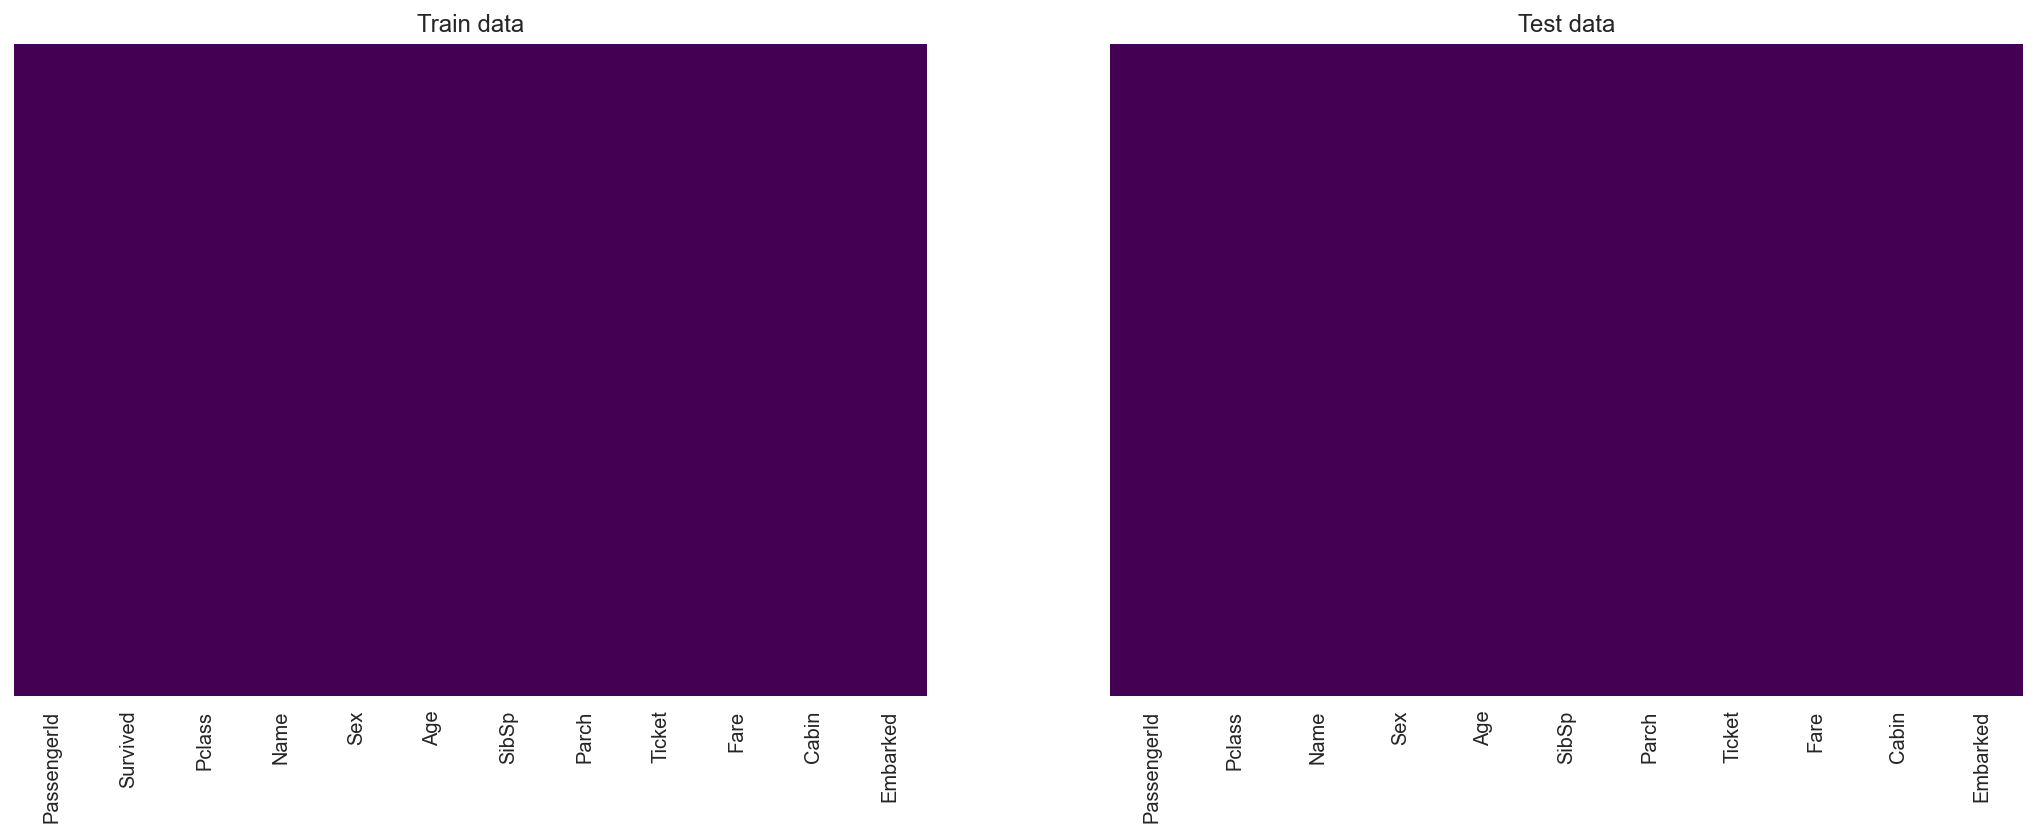

In [198]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
# train data 
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');


### Data Preprocessing and Feature Engineering

In [199]:
#encoding categorical features 'sex' and 'Embarked' on train  dataset 
train_data = pd.get_dummies(train_data, columns=['Sex'],drop_first=True)
train_data = pd.get_dummies(train_data,columns=['Embarked'],drop_first=True)

#encoding categorical features 'sex' and 'Embarked' features on test  dataset 
test_data = pd.get_dummies(test_data, columns=['Sex'],drop_first=True)
test_data = pd.get_dummies(test_data,columns=['Embarked'],drop_first=True)


In [200]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,1,1,0,1


In [201]:
#drop unnecessary features 'Name' and 'Ticket' from train dataset 
train_data=train_data.drop(['Name', 'Ticket'],axis=1)   

#drop unnecessary features 'Name' and 'Ticket' from test dataset 
test_data=test_data.drop(['Name', 'Ticket'],axis=1) 



---
#### Preparing for Visualisition
Identify the type of every variable (continuous or categorical)

In [202]:
# we divide the features to two categories numorics and categoricals
continuous_columns= ['Age','SibSp','Parch','Fare']
categorical_columns=['Pclass','Sex_male','Cabin','Embarked_Q','Embarked_S','Survived']
# print both lists
print('continue  features : ', continuous_columns)
print('categorize  features : ', categorical_columns)

continue  features :  ['Age', 'SibSp', 'Parch', 'Fare']
categorize  features :  ['Pclass', 'Sex_male', 'Cabin', 'Embarked_Q', 'Embarked_S', 'Survived']


In [203]:
categorical_columns=train_data[['Pclass','Sex_male','Cabin','Embarked_Q','Embarked_S','Survived']]
# create data frame contais categorical_columns

### Data Visualization
#### Univariate Analysis:

1- Train data


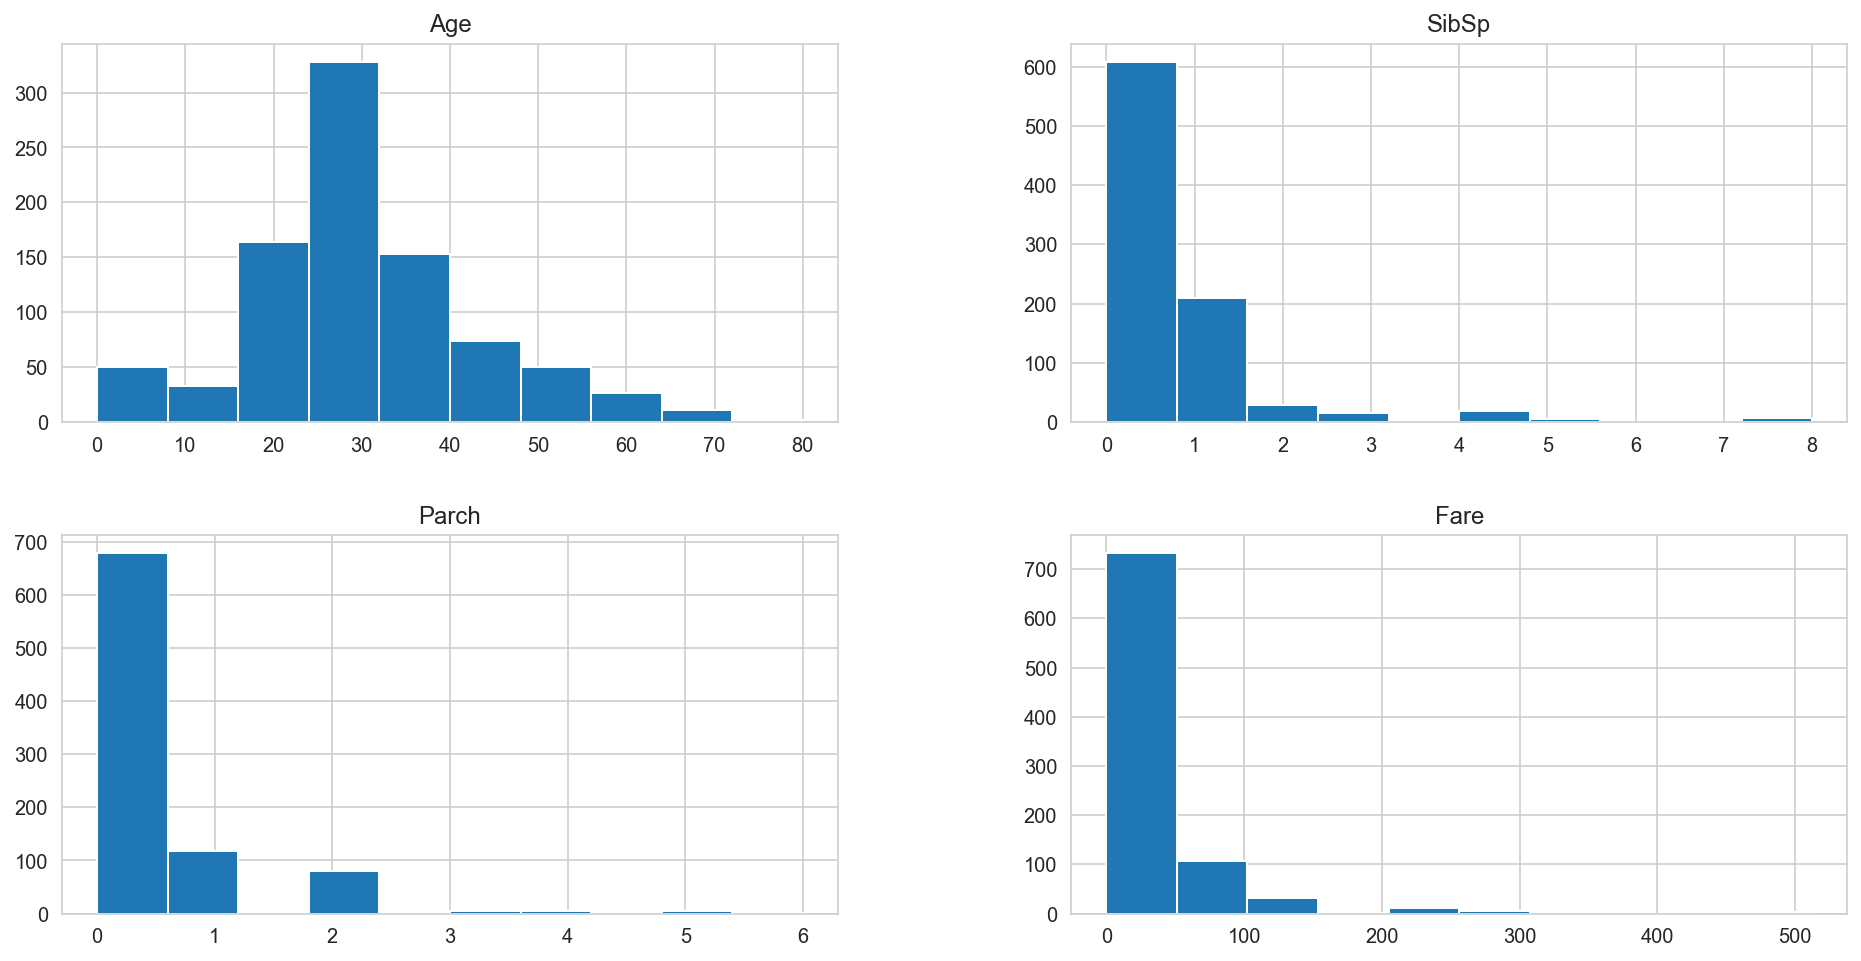

In [204]:
train_data.hist(column=continuous_columns, figsize=(16,8));

**We note the continuous variables on train taitanic dataset is unnormall distrbution. It is trend to positive skew.**

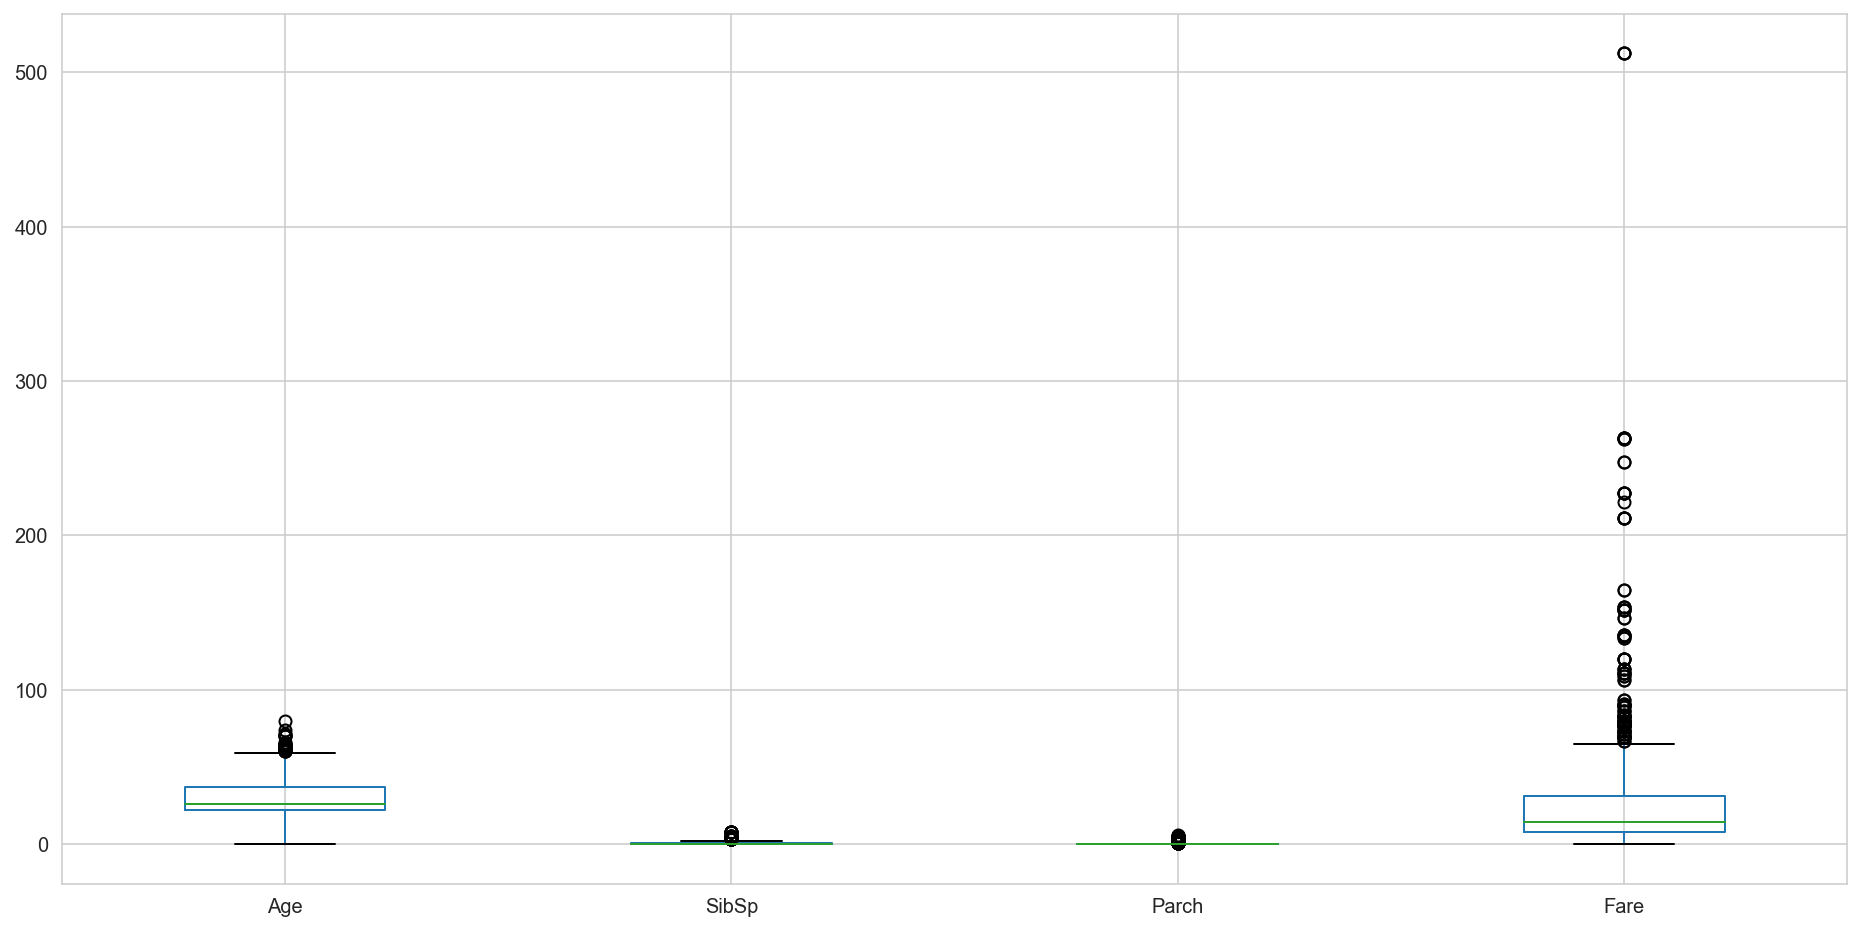

In [205]:
train_data.boxplot(column=continuous_columns, figsize=(16,8));

**We note that there are alot of outliers spesfically on 'Age' and 'Fare' features.**

2- Test data

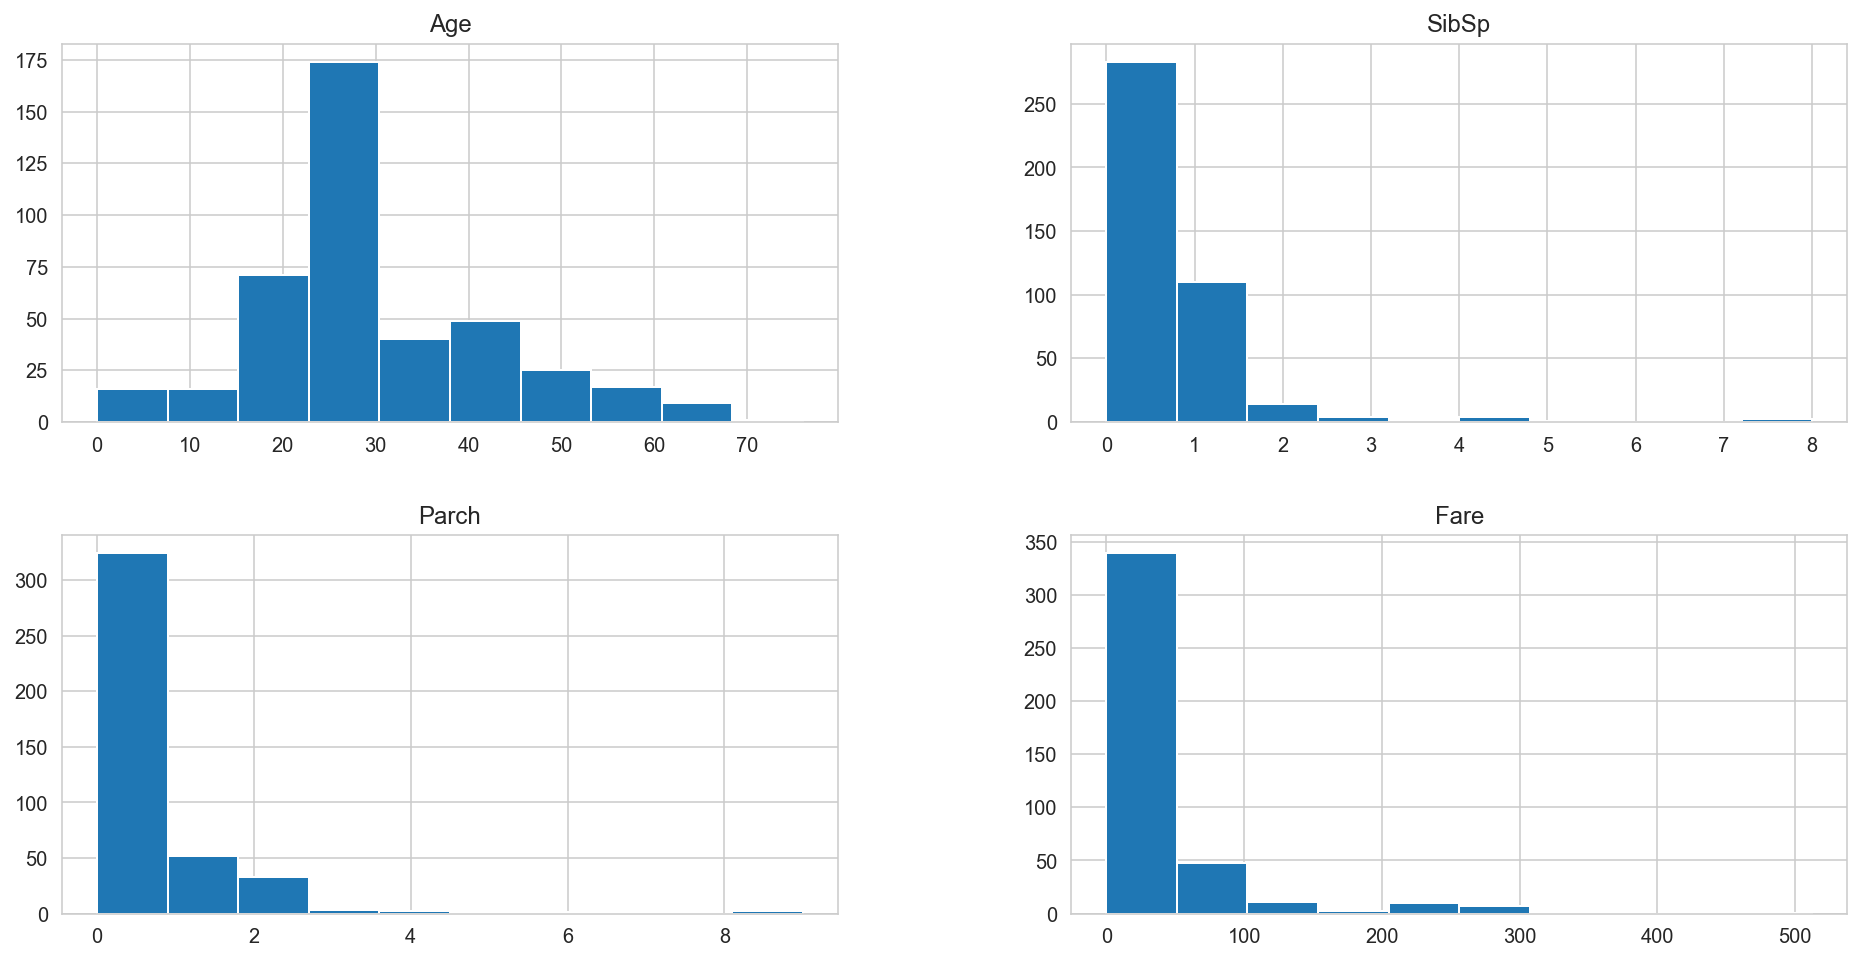

In [206]:
test_data.hist(column=continuous_columns, figsize=(16,8));

**We note the continuous variables on test taitanic dataset is unnormall distrbution. It is trend to positive skew.**

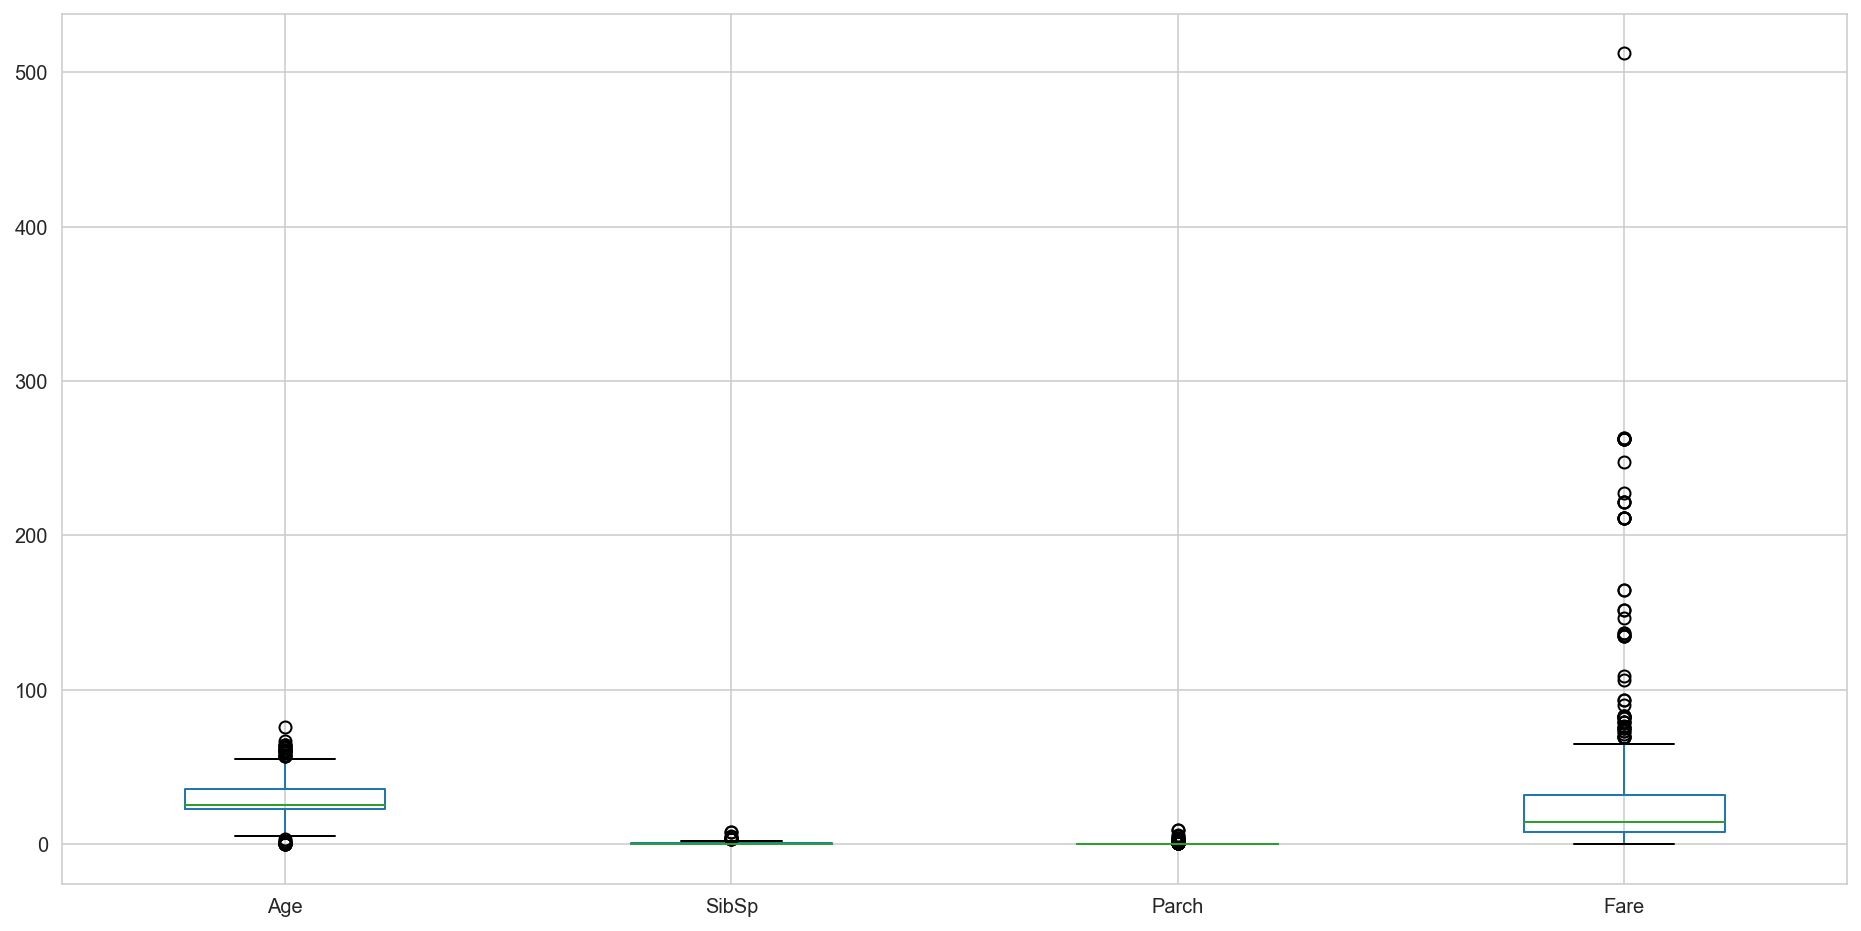

In [207]:
test_data.boxplot(column=continuous_columns, figsize=(16,8));

**As above char showung there are alot of outliers spesfically on'Age' and 'Fare' features.** 

#### visualize catigraical  features

1-Train Data

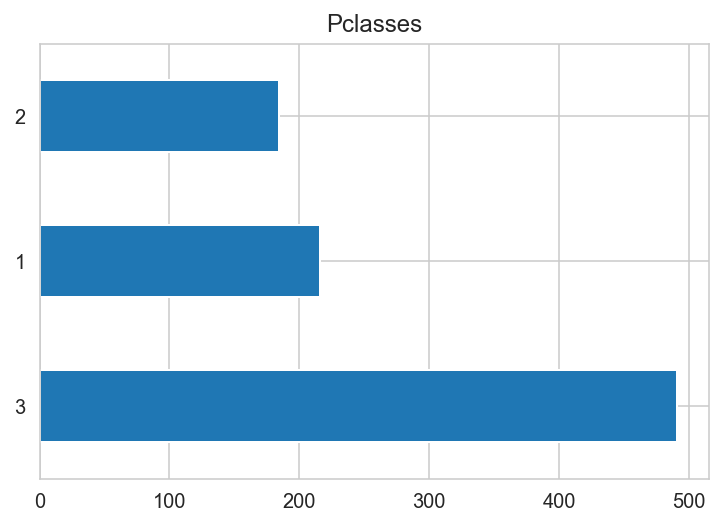

In [228]:
train_data.Pclass.value_counts().plot(kind='barh',title='Pclasses');  


2-Test Data

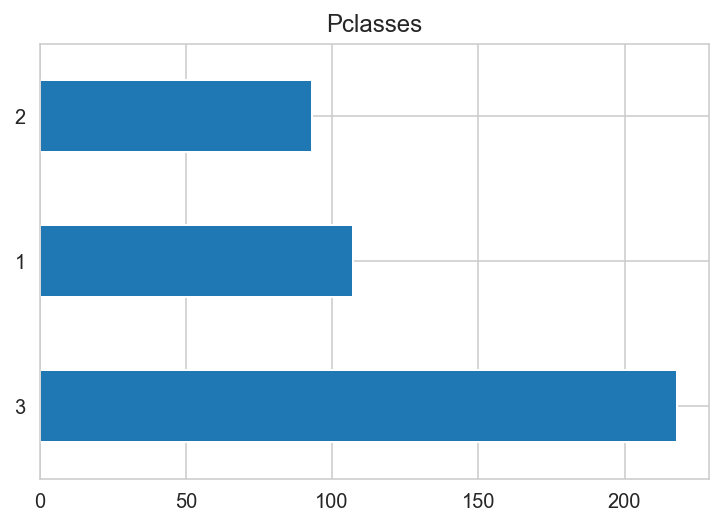

In [225]:
test_data.Pclass.value_counts().plot(kind='barh' , title='Pclasses');  


**As above char showing a lot of people there were at class 3**

#### Variate Analysis:

In [210]:
cn=list(categorical_columns.columns)

for i, column in enumerate(cn): 
    print(i,column)

0 Pclass
1 Sex_male
2 Cabin
3 Embarked_Q
4 Embarked_S
5 Survived


0 Pclass
1 Sex_male
2 Cabin
3 Embarked_Q
4 Embarked_S
5 Survived


<AxesSubplot:xlabel='Pclass'>

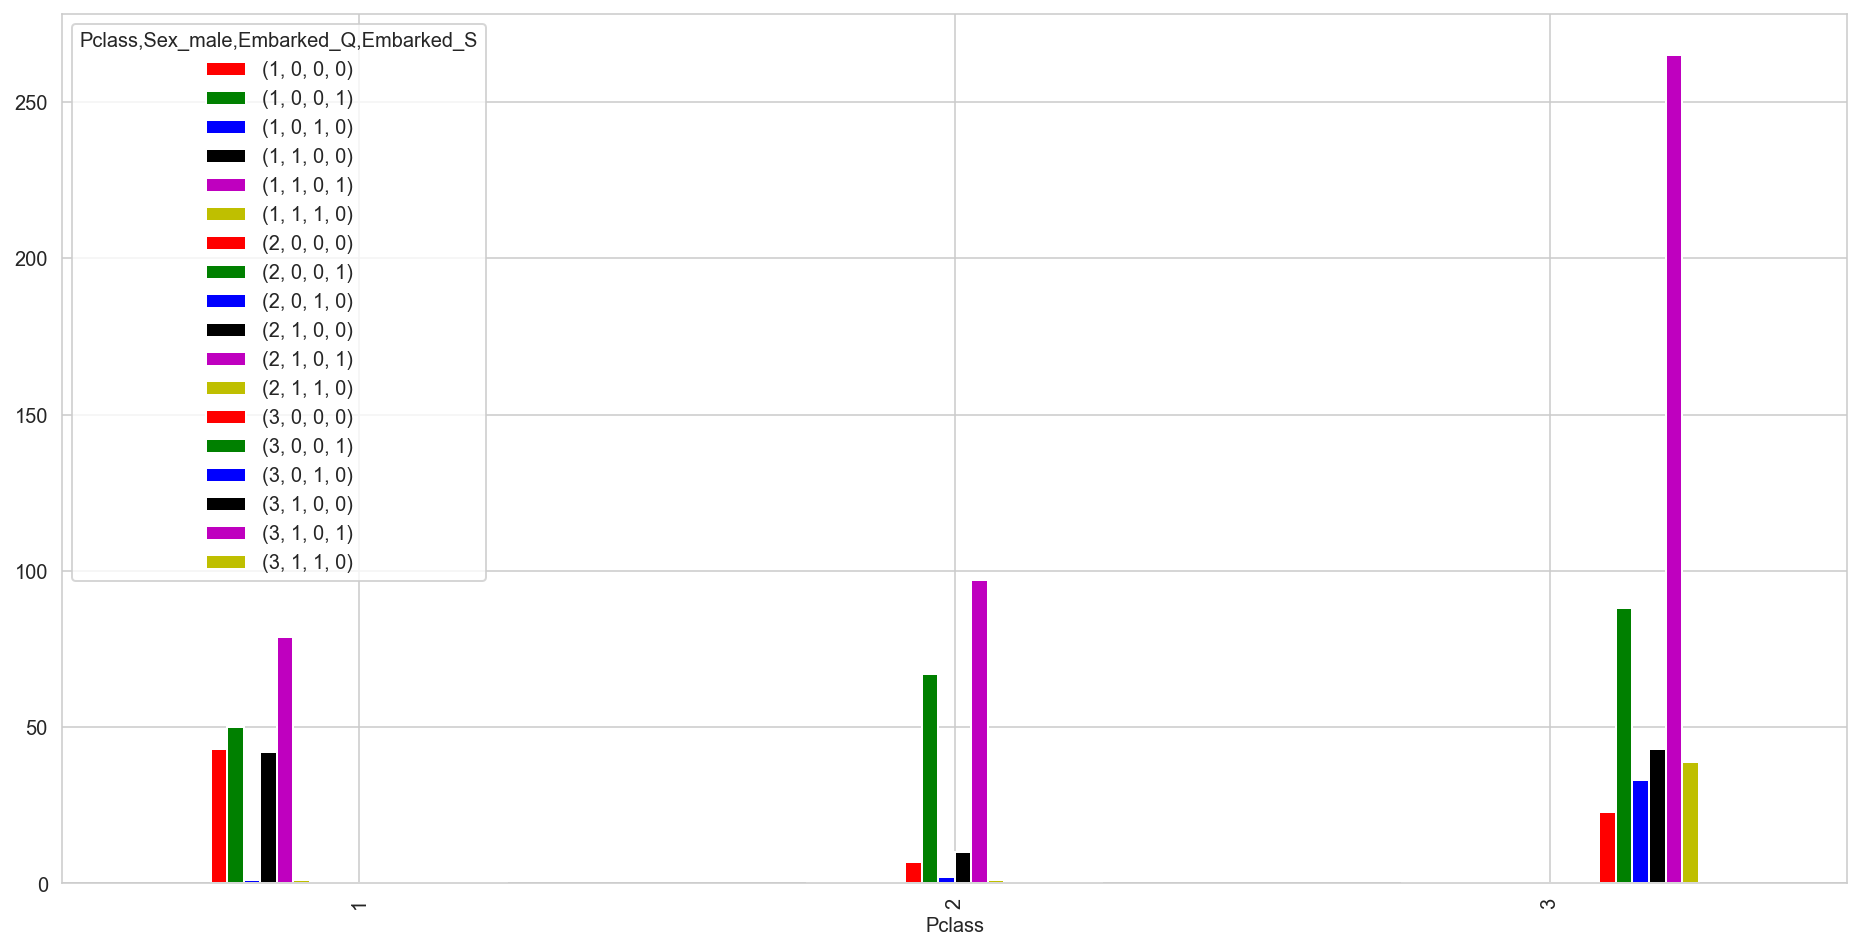

In [211]:
cn=list(categorical_columns.columns)

for i, column in enumerate(cn): 
    print(i,column)

group_counts = categorical_columns.groupby(['Pclass','Sex_male','Embarked_Q','Embarked_S']).count().reset_index()
# do pivot table
table = pd.pivot_table(group_counts, index='Pclass', columns=['Pclass','Sex_male','Embarked_Q','Embarked_S'], values='Survived')
# set your own colors here
table.plot(kind='bar', color=['r', 'g', 'b', 'k', 'm', 'y'],figsize=(16,8))

<AxesSubplot:xlabel='Pclass,Sex_male,Embarked_Q,Embarked_S'>

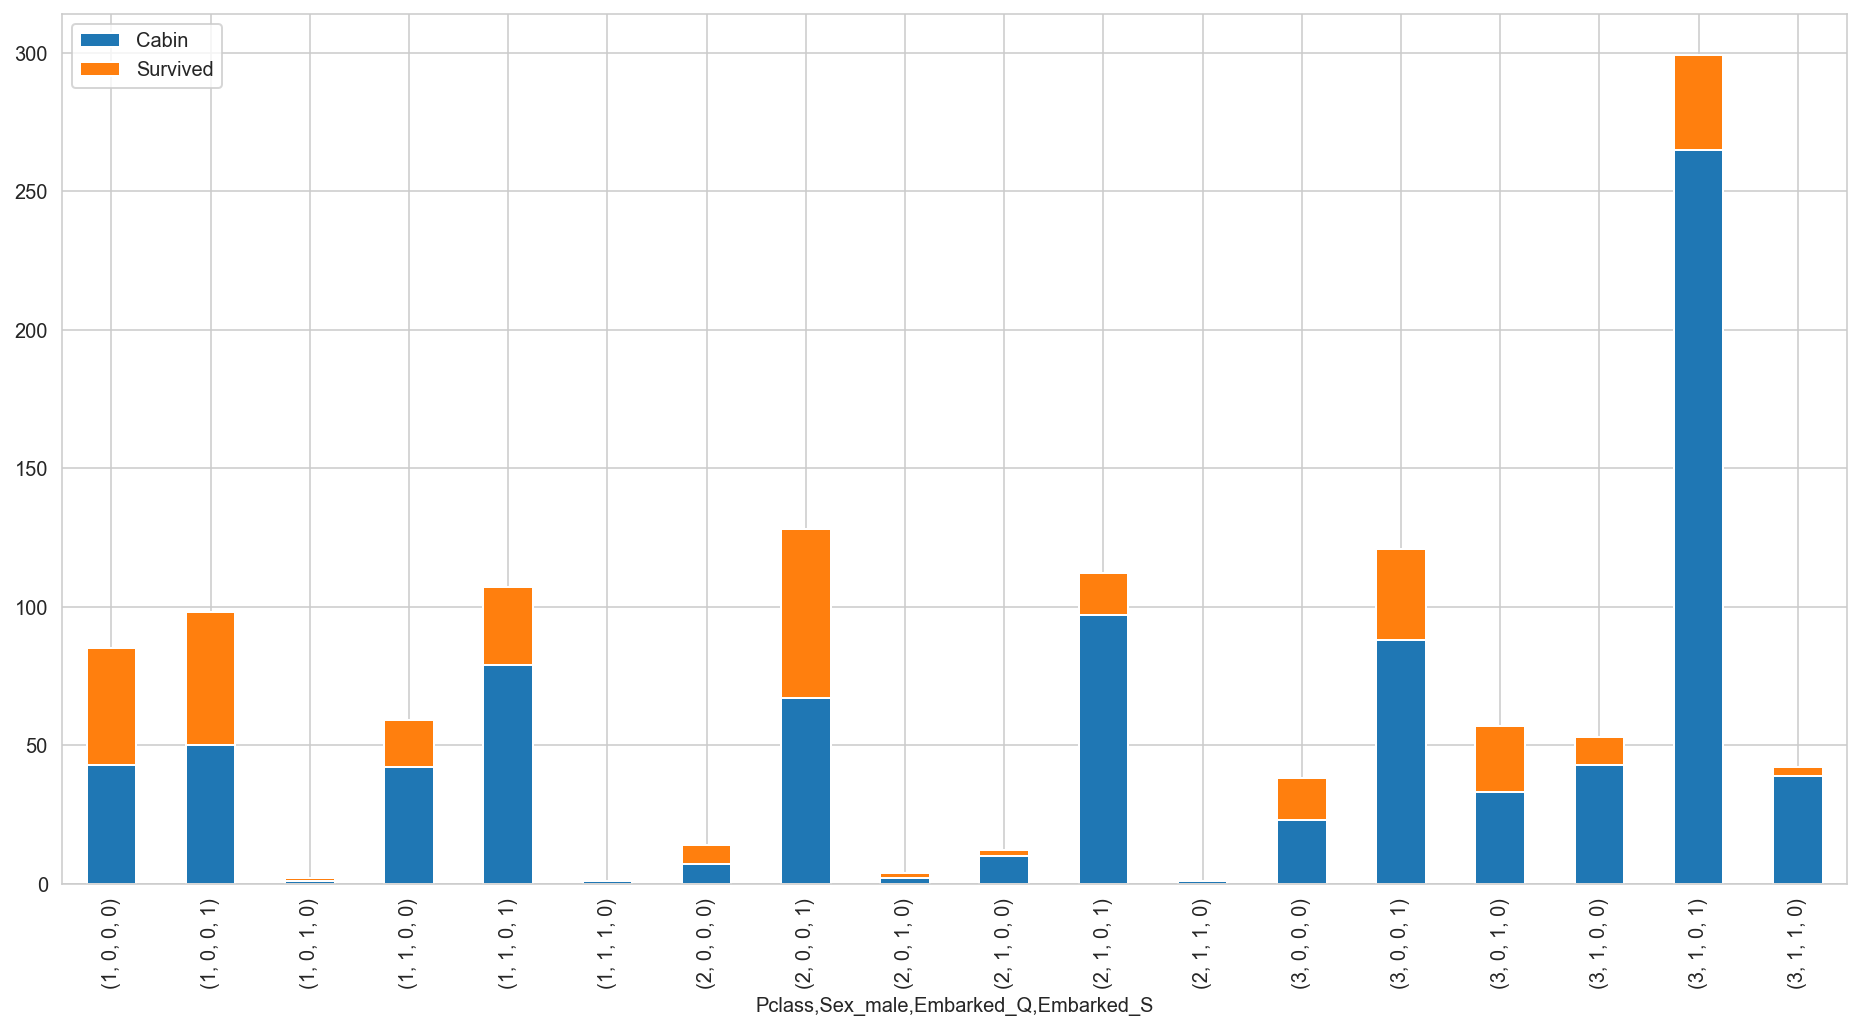

In [212]:

import seaborn as sns
categorical_columns.groupby(['Pclass','Sex_male','Embarked_Q','Embarked_S']).sum().plot(kind='bar',stacked=True,
                                                                            figsize=(16,8))

<AxesSubplot:xlabel='Pclass,Sex_male,Cabin,Embarked_Q,Embarked_S'>

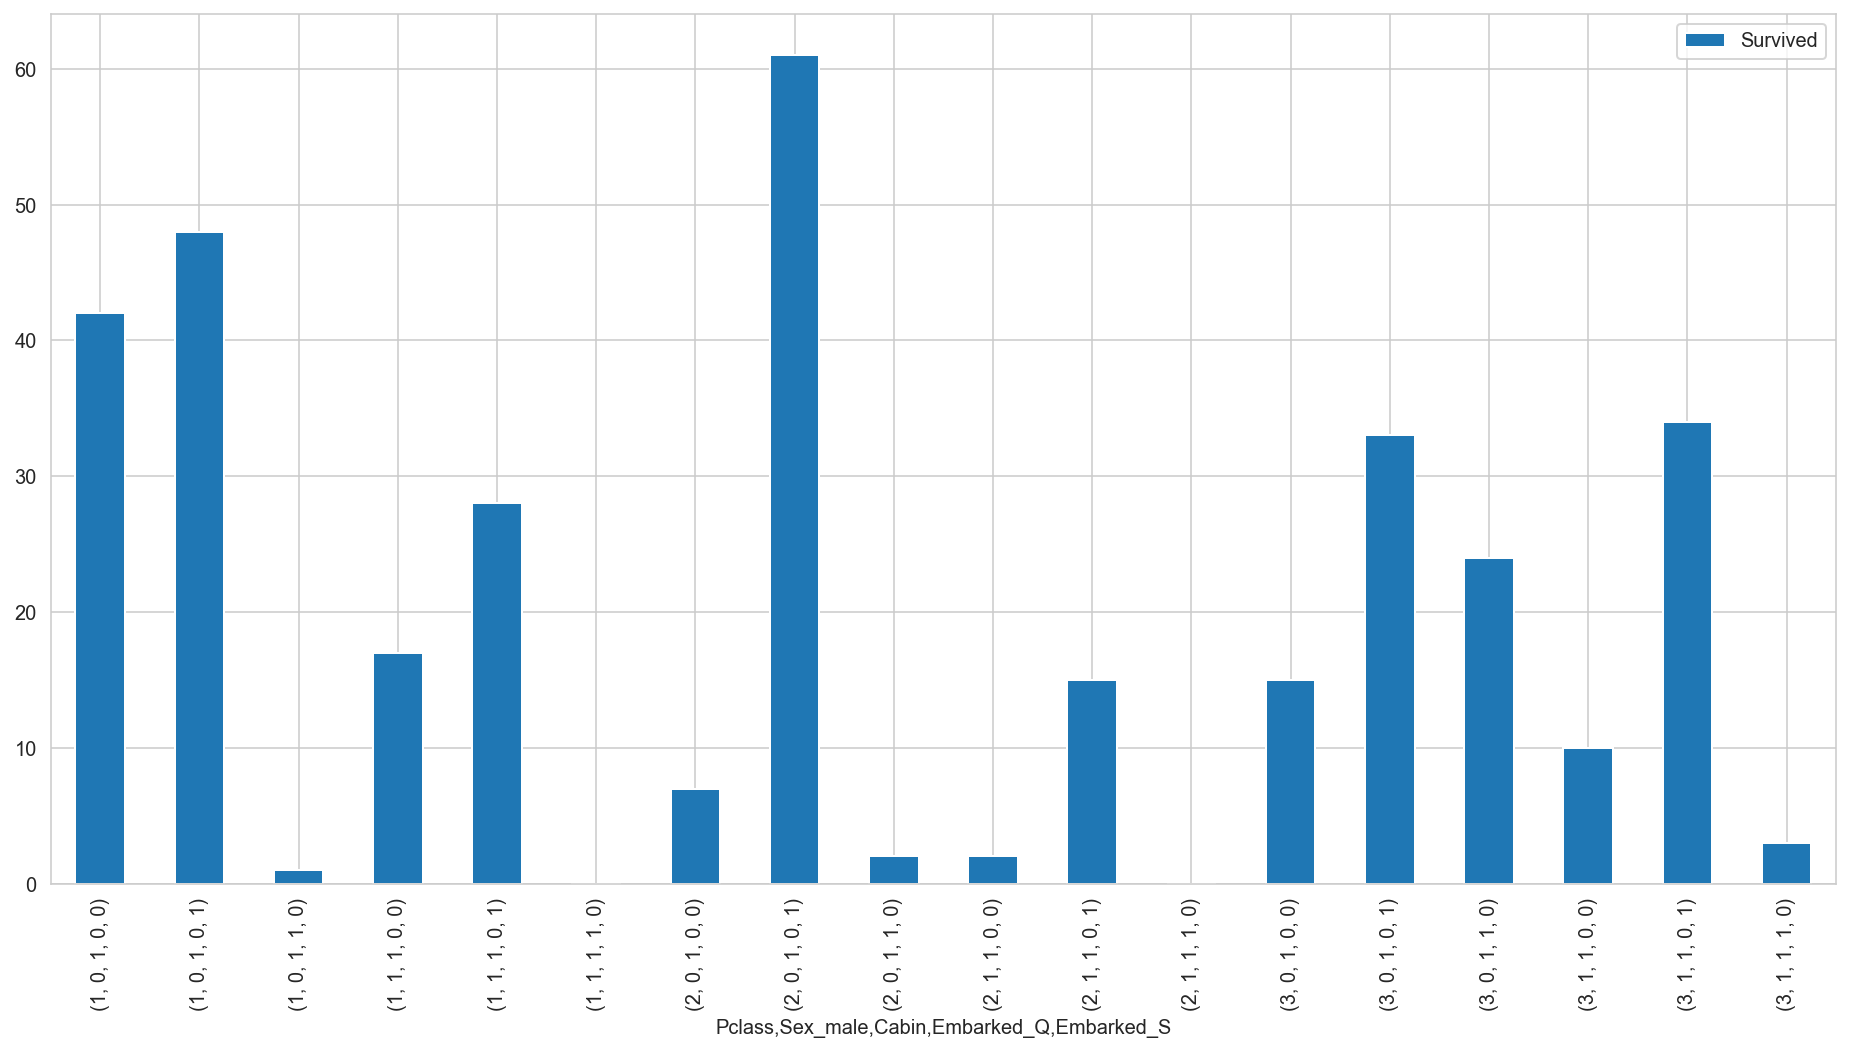

In [213]:

import seaborn as sns
categorical_columns.groupby(['Pclass','Sex_male','Cabin','Embarked_Q','Embarked_S']).sum().plot(kind='bar',stacked=True,
                                                                            figsize=(16,8))

**From all above graphs we can note, the meal at class 1 and Embarked (Q) has least a chance to survive. the women at class 2 has highest chance to survive.**

Text(0.5, 1.0, 'Survived v UnSurvived')

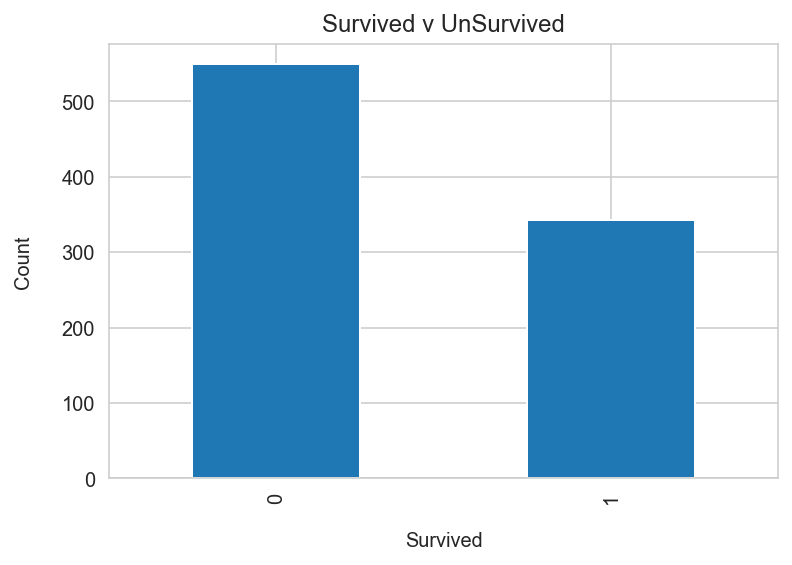

In [214]:
#we use a countplot() to see how many people survived and how many died?
train_data['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survived", labelpad=14)
plt.ylabel("Count", labelpad=14);
plt.title("Survived v UnSurvived")

**Unfortunately,a lot of people did not survive**

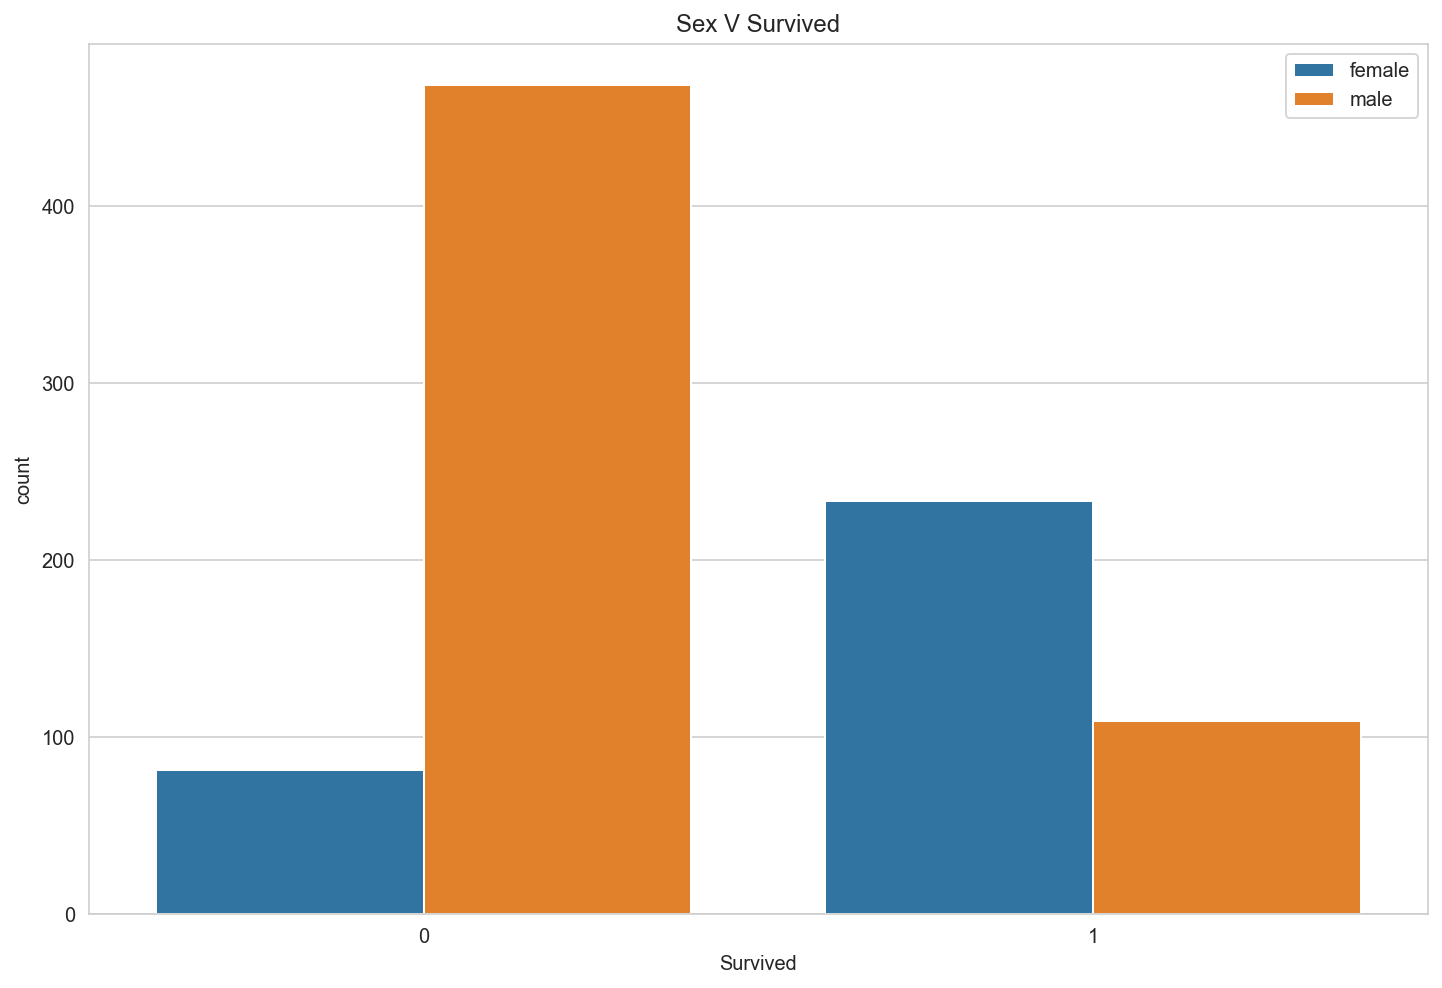

In [215]:
#we use hue to see which gender survived the most.
f,ax=plt.subplots(1,figsize=(12,8))
sns.countplot('Survived', hue='Sex_male',data=train_data,ax=ax)
plt.legend(['female', 'male'])
ax.set_title('Sex V Survived')
plt.show()

**we note the most female survied than male**

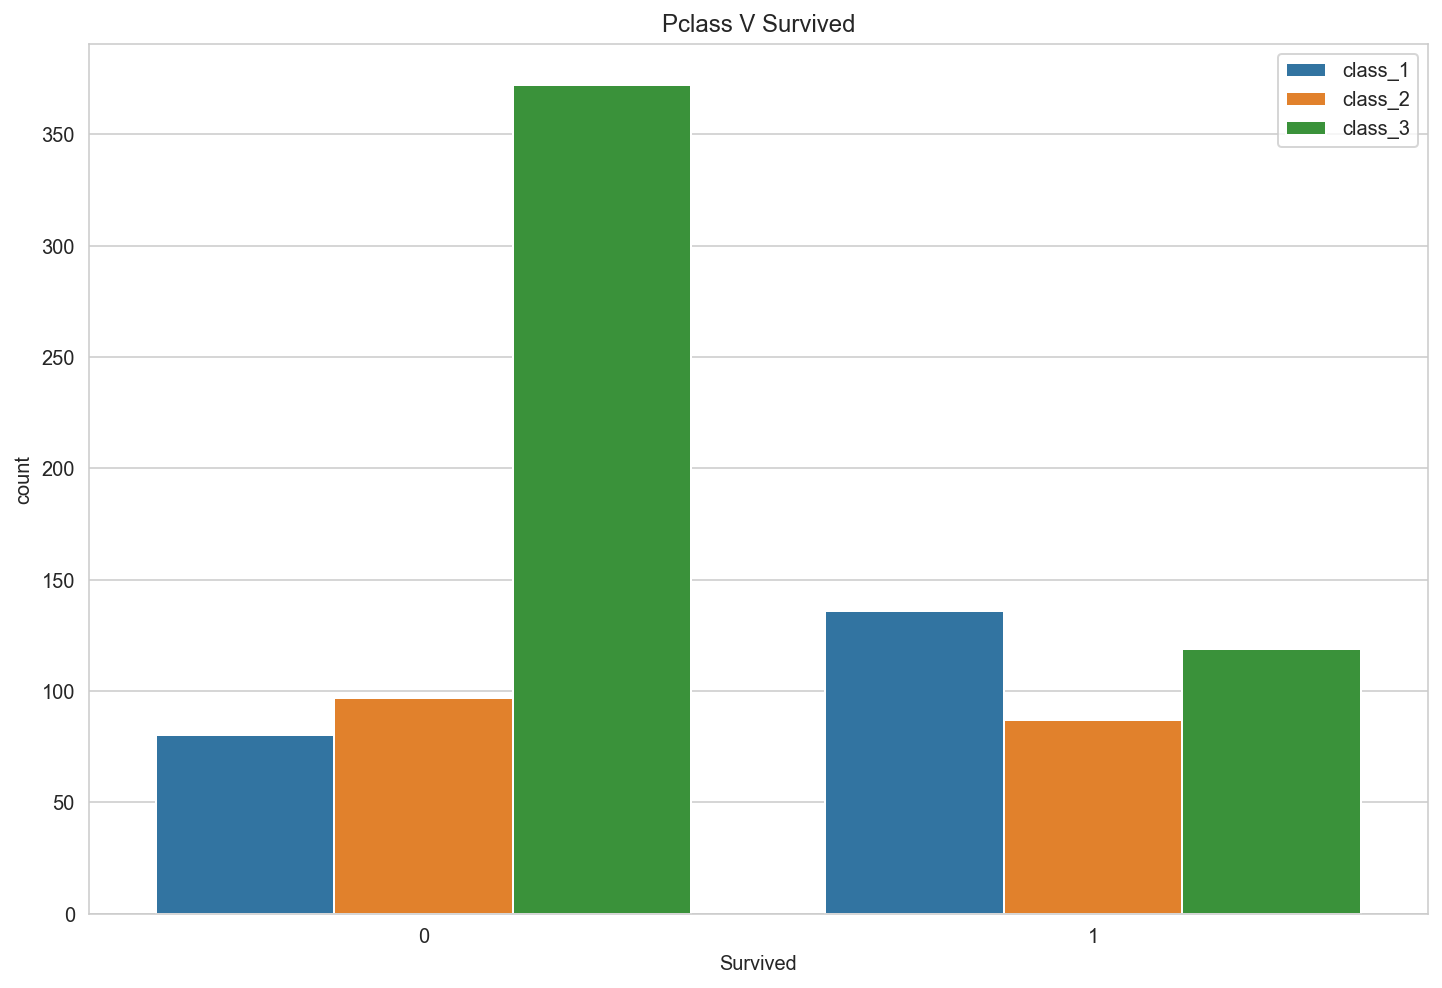

In [216]:
#if people who bought upper class seats survived more than people who bought lower class seats.  
f,ax=plt.subplots(1,figsize=(12,8))
sns.countplot('Survived', hue='Pclass',data=train_data,ax=ax)
plt.legend(['class_1', 'class_2','class_3'])
ax.set_title('Pclass V Survived')
plt.show()

**Based on above chart we can say the people from the upper class (class_1) survived more than other**

#### The linear correlations between the numeric variable

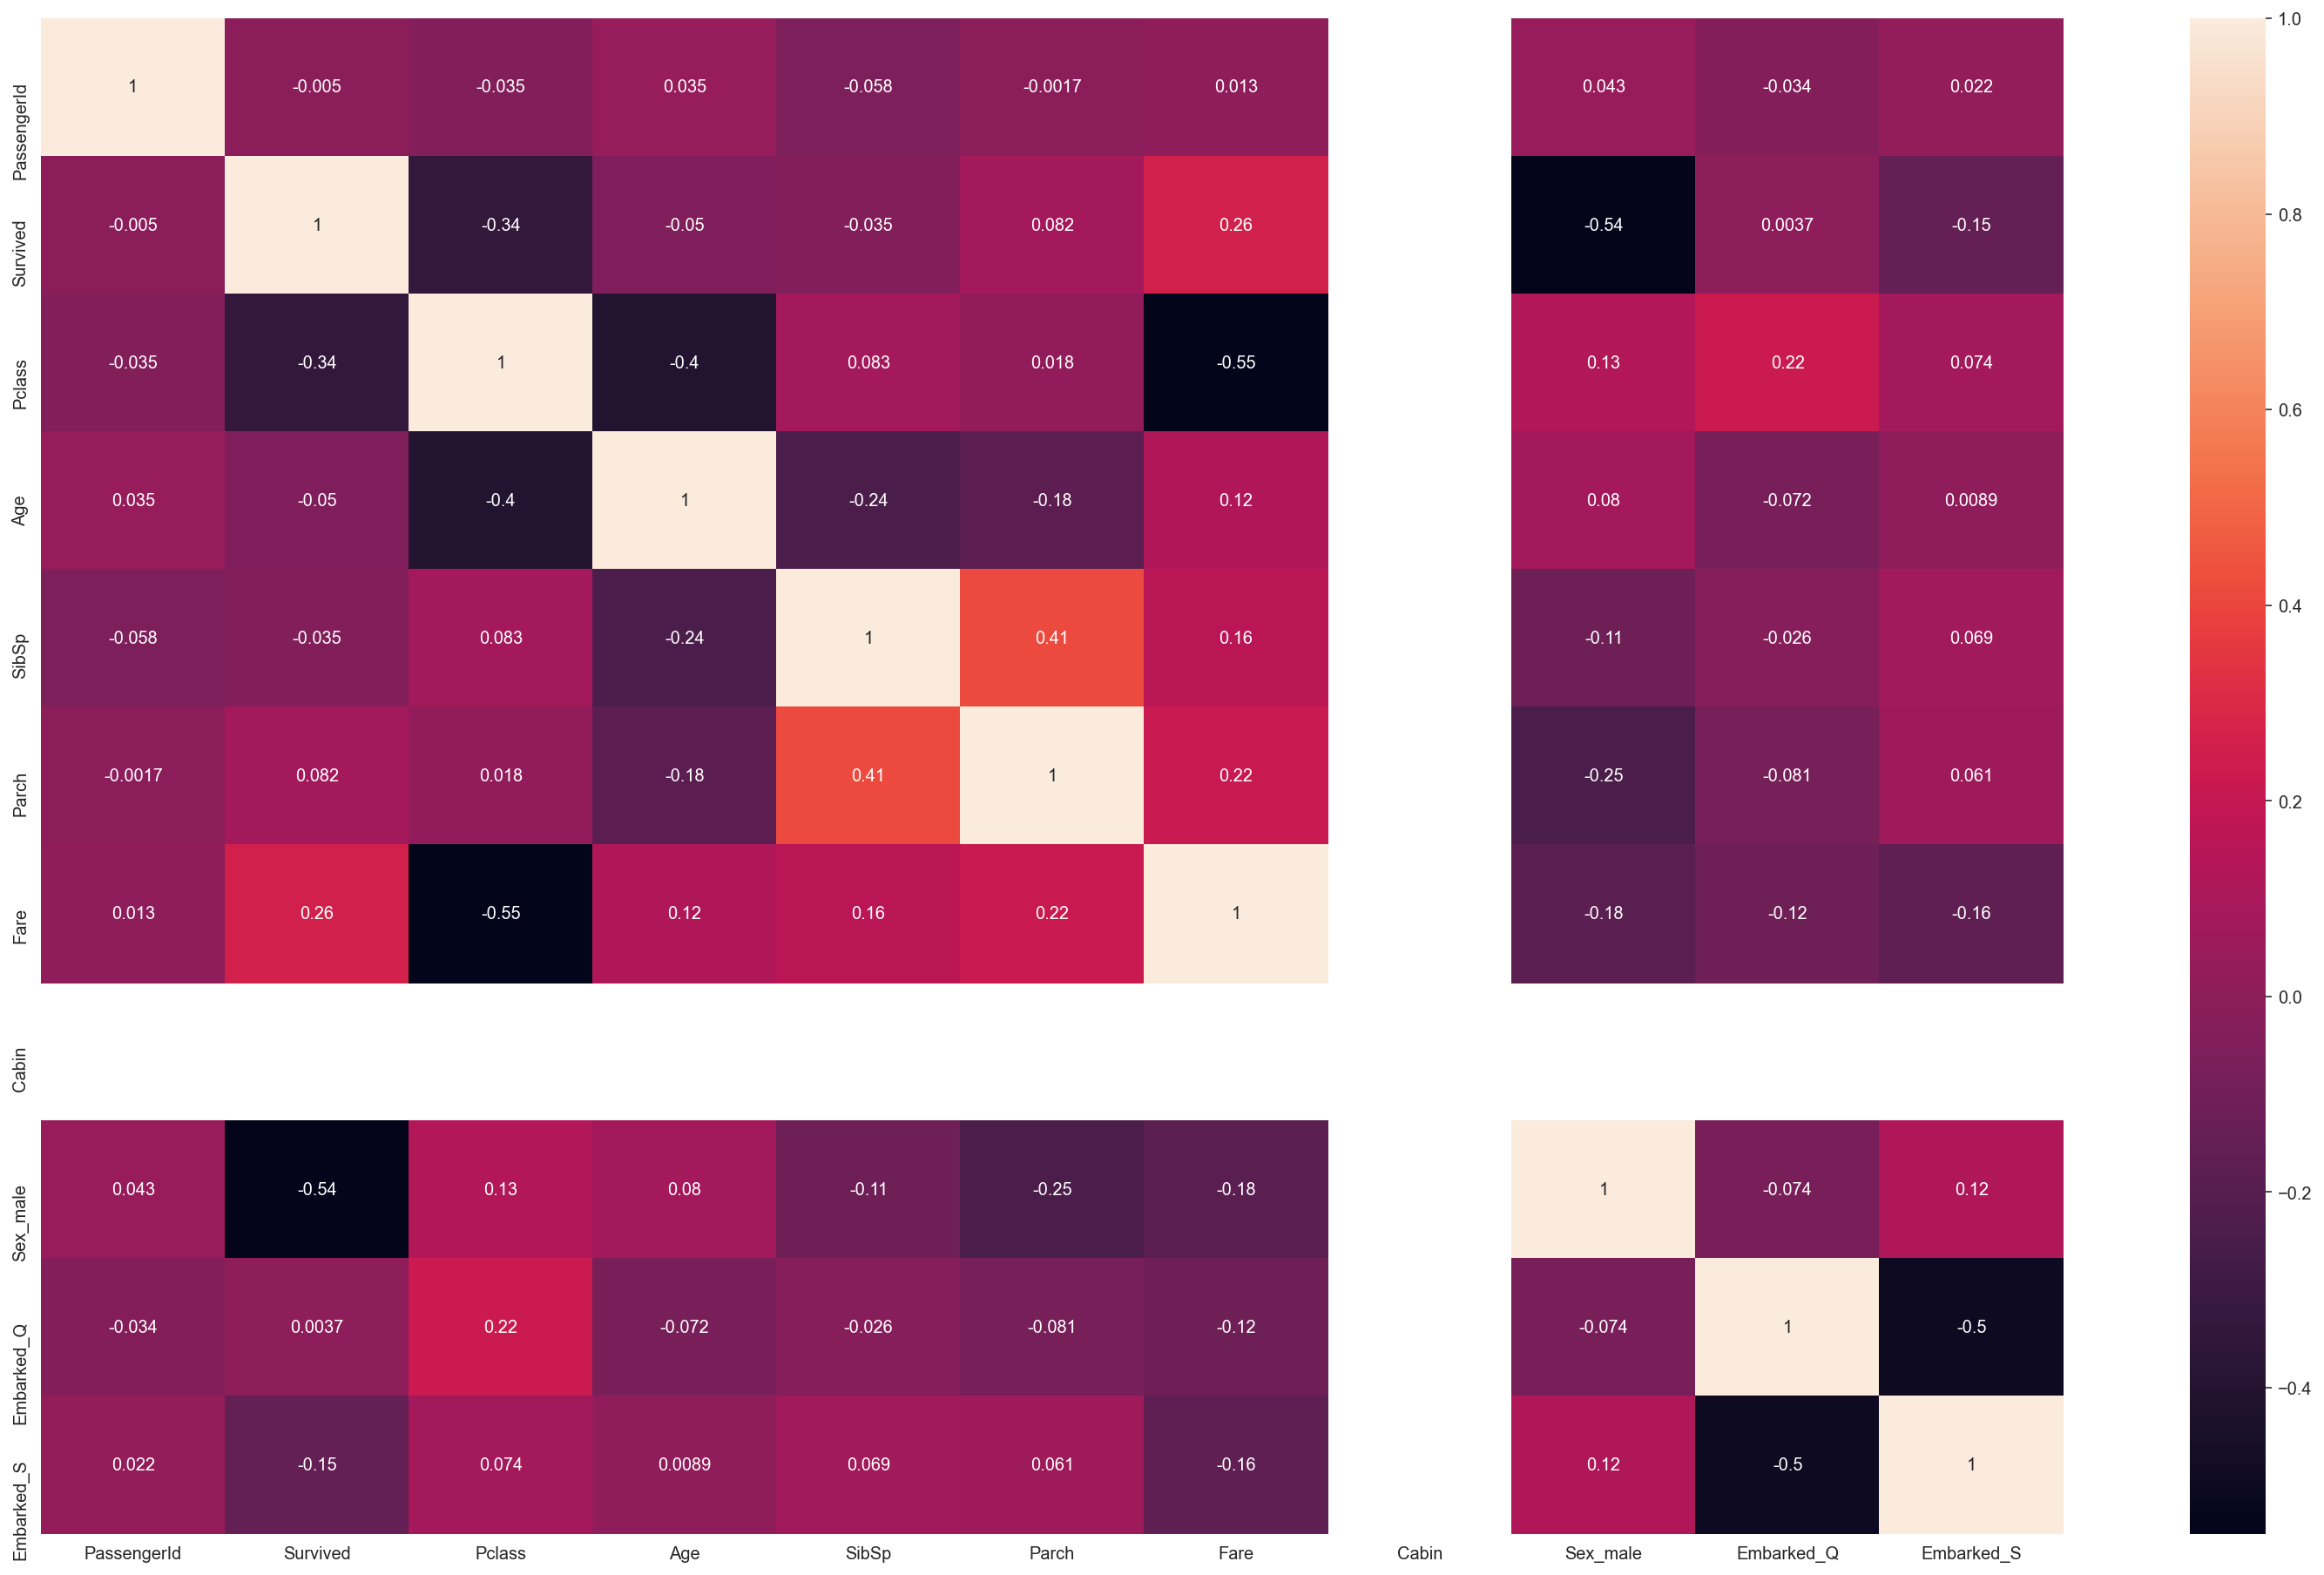

In [217]:

plt.figure(figsize=(26,16))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [218]:
#now assign the value for each X_train_data,y_train_data,X_test_data 
#drop 'PassengerId'column because they are useless
X_train_data=train_data.drop(['PassengerId', 'Survived'],axis=1)#drop survived because it is a target 
y_train_data=train_data['Survived']#assign target
X_test_data=test_data.drop(['PassengerId'],axis=1) #did te same in X_test
X_train_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')



### Build a baseline model

In [219]:
train_data.Survived.value_counts()/len(train_data.Survived)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_data.Sex_male.unique()

array([1, 0], dtype=uint8)

In [221]:
Xs_train_data = scaler.fit(X_train_data).transform(X_train_data)#

In [222]:
Xs_test_data=scaler.transform(X_test_data)

---

## Modelling

### 1- Logistic-Regression: 

In [56]:
# initiate and fit the model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()# initialization model
model_lr.fit(Xs_train_data, y_train_data)# fit model

LogisticRegression()

In [57]:
model_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Accuracy score, confusion matrix and classification report

In [58]:
LogisticRegression_predictions_train = model_lr.predict(Xs_train_data)#prediction Train data
LogisticRegression_predictions_test = model_lr.predict(Xs_test_data)#prediction test data

In [59]:
#print traindata score
LogisticRegression_train_score=model_lr.score(Xs_train_data, y_train_data)
print('LogisticRegression score in train= ',LogisticRegression_train_score)

LogisticRegression score in train=  0.8035914702581369


In [60]:
#print traindata accuracy score
print(metrics.accuracy_score(y_train_data, LogisticRegression_predictions_train))

0.8035914702581369


In [61]:
#print train confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_train_data, LogisticRegression_predictions_train)
print(confusion_matrix)

[[474  75]
 [100 242]]


In [62]:
#print report of model on traindata
print(metrics.classification_report(y_train_data, LogisticRegression_predictions_train))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       549
           1       0.76      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [63]:
LogisticRegression_predictions_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [64]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
LogisticRegression_predictions_df=pd.DataFrame(LogisticRegression_predictions_test,test_data['PassengerId']).reset_index()
LogisticRegression_predictions_df.rename(columns={0:'Survived'}, inplace=True)
LogisticRegression_predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [65]:
#save the dataframe as CSV format file to submitted in kaggle
LogisticRegression_predictions_df.to_csv('LRP_MMN.csv',index=False)

Screen Shot 2021-01-06 at 11.43.08 AM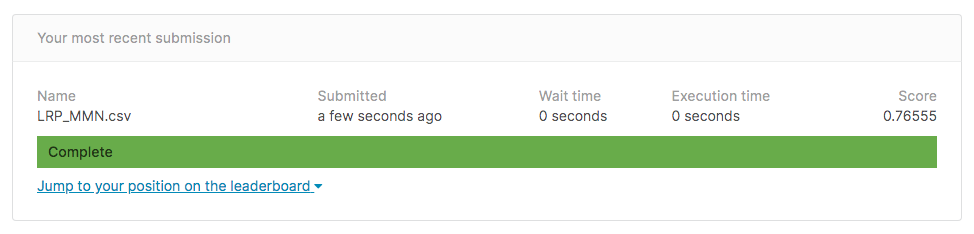

In [66]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_lr = cross_val_score(model_lr, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Logistic Regression", "Train", s_lr.mean().round(3)))

Logistic Regression Train Score:	0.797 


### 2- Knn-Classifier: 


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()# Instantiate model
knn.fit(Xs_train_data, y_train_data) #fit model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [68]:
Knn_predictions_train = knn.predict(Xs_train_data)#did model prediction on traindata
Knn_predictions_test = knn.predict(Xs_test_data)#did model prediction on test

In [69]:
#compute and print model score
Knn_train_score=knn.score(Xs_train_data, y_train_data)
print('Knn score in train= ',Knn_train_score)


Knn score in train=  0.8664421997755332


In [70]:
#print confusion metrices
confusion_matrix = metrics.confusion_matrix(y_train_data, Knn_predictions_train)
print(confusion_matrix)

[[501  48]
 [ 71 271]]


In [71]:
#print model report 
print(metrics.classification_report(y_train_data, Knn_predictions_train))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       549
           1       0.85      0.79      0.82       342

    accuracy                           0.87       891
   macro avg       0.86      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891



In [72]:
Knn_predictions_test

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 

Knn_df=pd.DataFrame(Knn_predictions_test,test_data['PassengerId']).reset_index()
Knn_df.rename(columns={0:'Survived'}, inplace=True)
Knn_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [74]:
#save the dataframe as CSV format file to submitted in kaggle
Knn_df.to_csv('knn_MMN.csv',index=False)

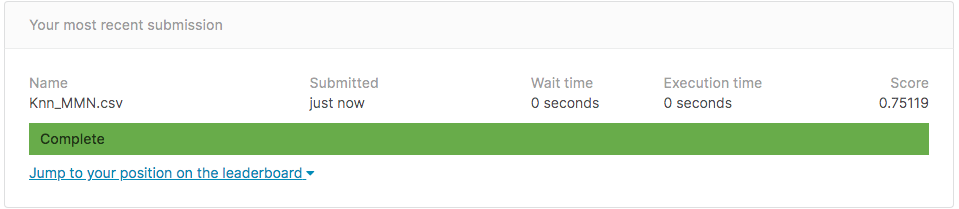

In [75]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_knn_ = cross_val_score(knn, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("KNN", "Train", s_knn_.mean().round(3)))

KNN Train Score:	0.811 


### 3- Decision tree

In [76]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [77]:
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=1234)# initialize model
dt.fit(Xs_train_data, y_train_data)#fit model 

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [79]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [80]:
tree_predictions_train = dt.predict(Xs_train_data)#did model prediction on traindata
tree_predictions_test = dt.predict(Xs_test_data)#did model prediction on testdata

In [81]:
#compute and print model score
tree_train_score=dt.score(Xs_train_data, y_train_data)
print('Tree score in train= ',tree_train_score)

Tree score in train=  0.8271604938271605


In [82]:
#print confusion metrices
confusion_matrix = metrics.confusion_matrix(y_train_data, tree_predictions_train)
print(confusion_matrix)

[[493  56]
 [ 98 244]]


In [83]:
#print model report 
print(metrics.classification_report(y_train_data, tree_predictions_train))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.82       891



In [84]:
tree_predictions_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
tree_df=pd.DataFrame(tree_predictions_test,test_data['PassengerId']).reset_index()
tree_df.rename(columns={0:'Survived'}, inplace=True)
tree_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [86]:
#save the dataframe as CSV format file to submitted in kaggle
tree_df.to_csv('tree_MMN.csv',index=False)

tree_test_score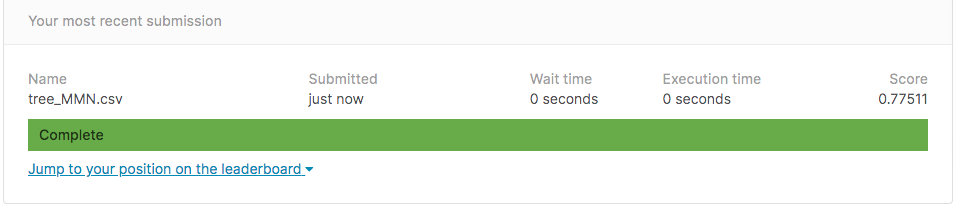

In [87]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_dt = cross_val_score(dt, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Decision tree", "Train", s_dt.mean().round(3)))

Decision tree Train Score:	0.807 


### 4 -Bagging
 - KNN
 - Decision Trees

In [88]:
from sklearn.ensemble import BaggingClassifier

In [89]:
knn = KNeighborsClassifier()# initialize model
knn_en = BaggingClassifier(base_estimator=knn, max_features=.8,max_samples=.8 )# initialize model
knn_en.fit(Xs_train_data, y_train_data)#fit model
knn_en.get_params()

{'base_estimator__algorithm': 'auto',
 'base_estimator__leaf_size': 30,
 'base_estimator__metric': 'minkowski',
 'base_estimator__metric_params': None,
 'base_estimator__n_jobs': None,
 'base_estimator__n_neighbors': 5,
 'base_estimator__p': 2,
 'base_estimator__weights': 'uniform',
 'base_estimator': KNeighborsClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 0.8,
 'max_samples': 0.8,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [91]:
knn_en_predictions_train = knn_en.predict(Xs_train_data)#did model prediction on traindata
knn_en_predictions_test = knn_en.predict(Xs_test_data)#did model prediction on testdata

In [92]:
#compute and print model score
bag_train_score=knn_en.score(Xs_train_data, y_train_data)
print('bagging Knn score in train= ',bag_train_score)

bagging Knn score in train=  0.8754208754208754


In [93]:
#print confusion metrices
confusion_matrix = metrics.confusion_matrix(y_train_data, knn_en_predictions_train)
print(confusion_matrix)

[[511  38]
 [ 73 269]]


In [94]:
#print model report 
print(metrics.classification_report(y_train_data, knn_en_predictions_train))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       549
           1       0.88      0.79      0.83       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.87       891



In [95]:
knn_en_predictions_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
bag_knn_df=pd.DataFrame(knn_en_predictions_test,test_data['PassengerId']).reset_index()
bag_knn_df.rename(columns={0:'Survived'}, inplace=True)
bag_knn_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [97]:
#save the dataframe as CSV format file to submitted in kaggle
bag_knn_df.to_csv('bag_knn_MMN.csv',index=False)

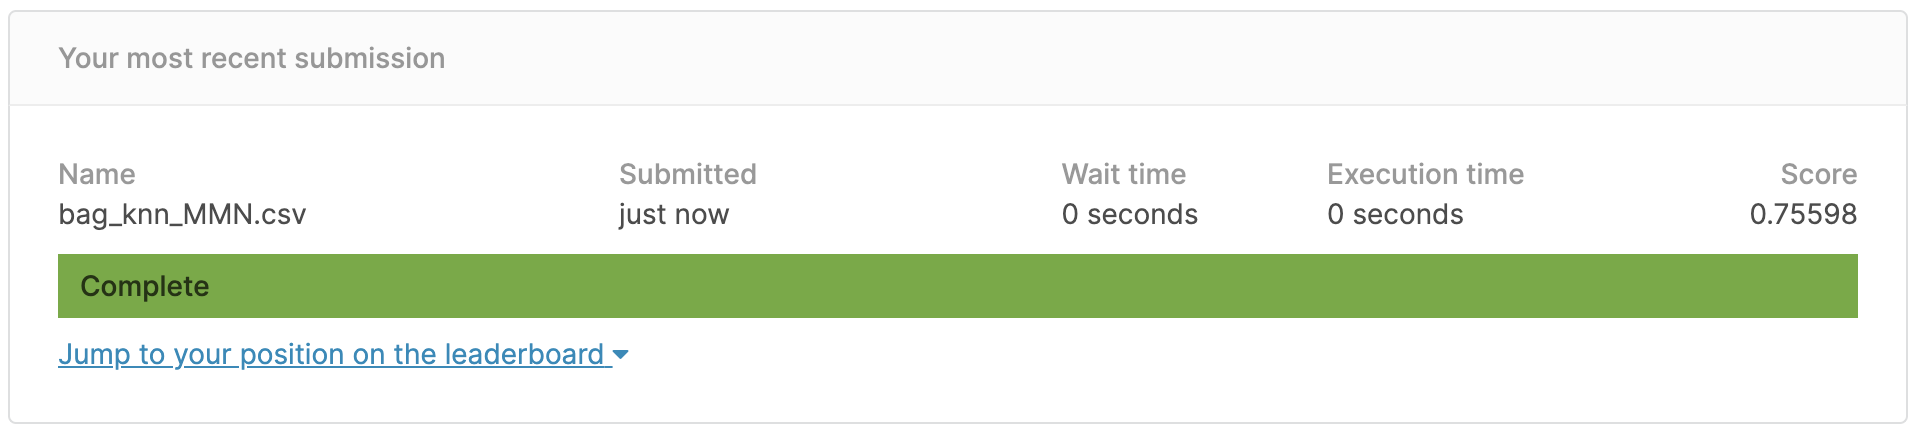

In [98]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_knn_en = cross_val_score(knn_en, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Bagging KNN", "Train", s_knn_en.mean().round(3)))

Bagging KNN Train Score:	0.802 


- Decision Trees bagging

In [99]:
dt = DecisionTreeClassifier()# initialize model
dt_en = BaggingClassifier(base_estimator=dt)# initialize model
dt_en.fit(Xs_train_data, y_train_data)#fit model
dt_en.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [100]:
dt_en_predictions_train = dt_en.predict(Xs_train_data)#did model prediction on traindata
dt_en_predictions_test = dt_en.predict(Xs_test_data)#did model prediction on testdata

In [101]:
#compute and print model score
bag_dt_en_train_score=dt_en.score(Xs_train_data, y_train_data)
print('bagging Decision Tree score in train= ',bag_dt_en_train_score)

bagging Decision Tree score in train=  0.9741863075196409


In [102]:
#print confusion metrices
confusion_matrix = metrics.confusion_matrix(y_train_data, dt_en_predictions_train)
print(confusion_matrix)

[[543   6]
 [ 17 325]]


In [103]:
#print model report 
print(metrics.classification_report(y_train_data, dt_en_predictions_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.98      0.95      0.97       342

    accuracy                           0.97       891
   macro avg       0.98      0.97      0.97       891
weighted avg       0.97      0.97      0.97       891



In [104]:
dt_en_predictions_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
bag_dt_df=pd.DataFrame(dt_en_predictions_test,test_data['PassengerId']).reset_index()
bag_dt_df.rename(columns={0:'Survived'}, inplace=True)
bag_dt_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [106]:
#save the dataframe as CSV format file to submitted in kaggle
bag_dt_df.to_csv('bag_dt_MMN.csv',index=False)

bag_dt_test_score.png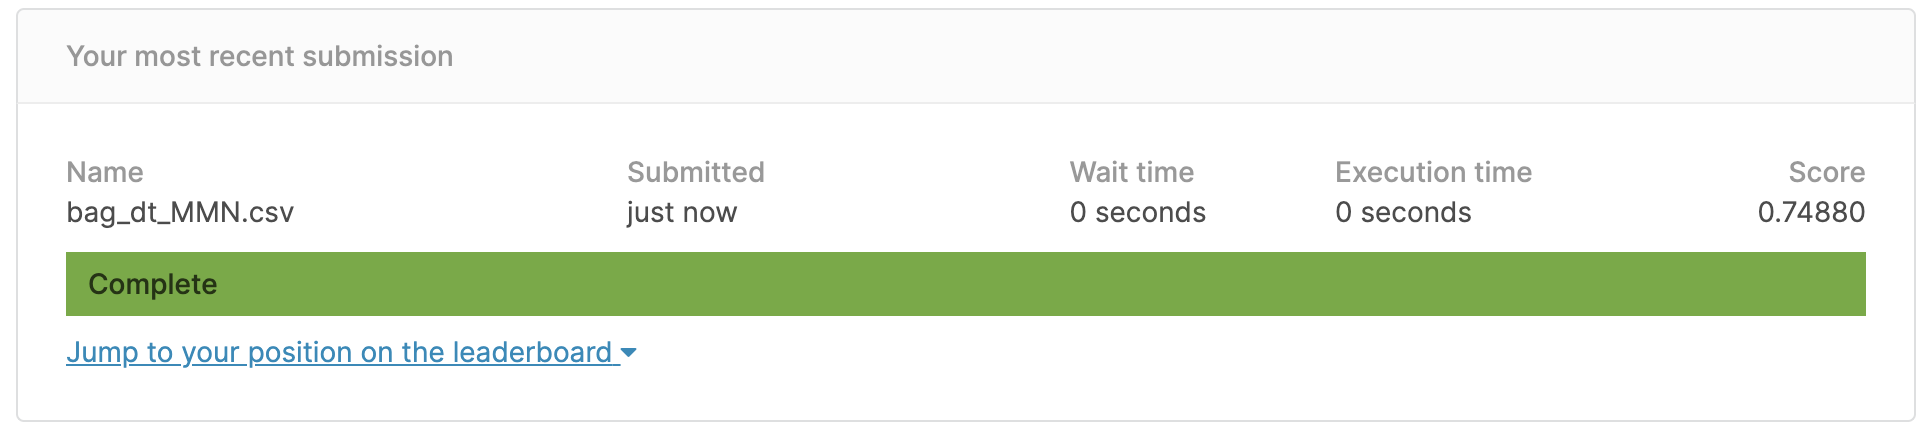

In [107]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_dt_en = cross_val_score(dt_en, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Decision Trees bagging", "Train", s_dt_en.mean().round(3)))

Decision Trees bagging Train Score:	0.817 


### 5- Random Forests

In [108]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [109]:
rf = RandomForestClassifier()# initialize model
rf.fit(Xs_train_data, y_train_data)#fit model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
rf_predictions_train = rf.predict(Xs_train_data)##did model prediction on traindata
rf_predictions_test = rf.predict(Xs_test_data)#did model prediction on testdata


In [111]:
#compute and print model score
rf_en_train_score=rf.score(Xs_train_data, y_train_data)#did model prediction on traindata
print('Random Forests score in train= ',rf_en_train_score)#did model prediction on testdata

Random Forests score in train=  0.9809203142536476


In [112]:
#print confusion metrices
confusion_matrix = metrics.confusion_matrix(y_train_data, rf_predictions_train)
print(confusion_matrix)

[[545   4]
 [ 13 329]]


In [113]:
#print model report 
print(metrics.classification_report(y_train_data, rf_predictions_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [114]:
rf_predictions_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [115]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
rf_df=pd.DataFrame(rf_predictions_test,test_data['PassengerId']).reset_index()
rf_df.rename(columns={0:'Survived'}, inplace=True)
rf_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [116]:
#save the dataframe as CSV format file to submitted in kaggle
rf_df.to_csv('rf_MMN.csv',index=False)

rf_test_score.png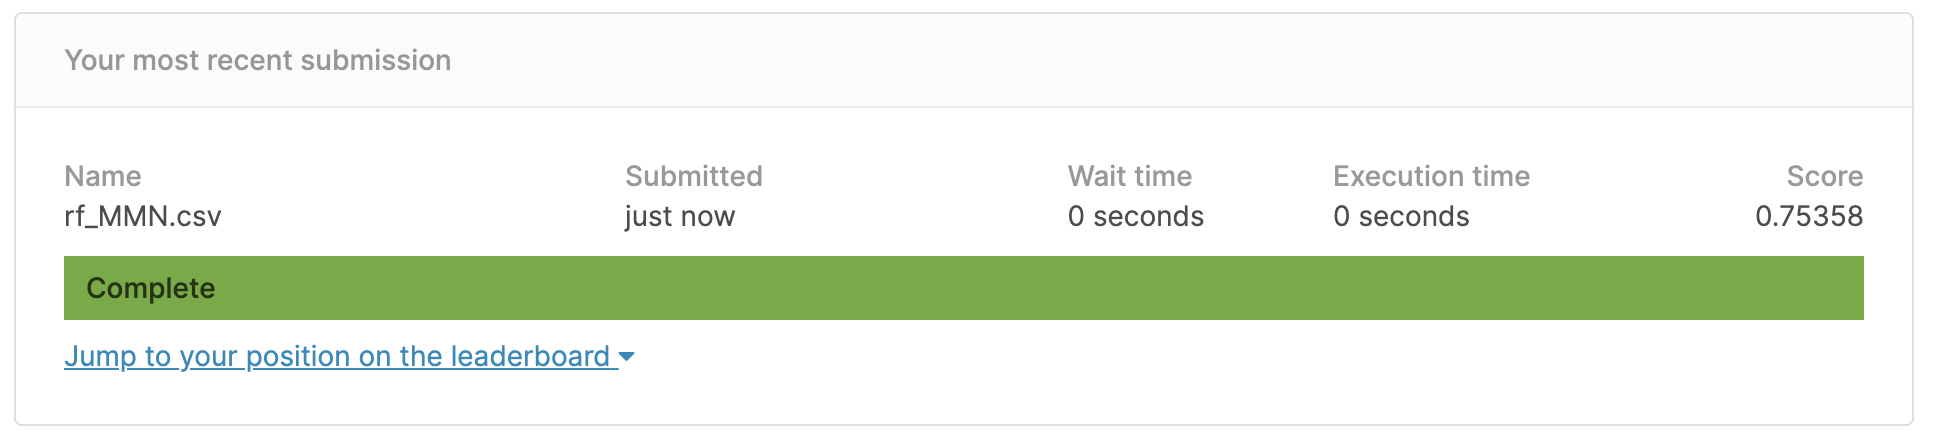

In [117]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_rf = cross_val_score(rf, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Random Forest", "Train", s_rf.mean().round(3)))

Random Forest Train Score:	0.811 


### 6- Extra Trees

In [118]:
ex_t = ExtraTreesClassifier()# initialize model
ex_t.fit(Xs_train_data, y_train_data)#fit model
ex_t.get_params()#get model parameters

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [119]:
ex_t_predictions_train = ex_t.predict(Xs_train_data)#did model prediction on traindata
ex_t_predictions_test = ex_t.predict(Xs_test_data)#did model prediction on testdata

In [120]:
#compute and print model score
ex_t_train_score=ex_t.score(Xs_train_data, y_train_data)
print('Extra Trees score in train= ',ex_t_train_score)

Extra Trees score in train=  0.9809203142536476


In [121]:
#print confusion metrices
confusion_matrix = metrics.confusion_matrix(y_train_data, ex_t_predictions_train)
print(confusion_matrix)

[[547   2]
 [ 15 327]]


In [122]:
#print model report 
print(metrics.classification_report(y_train_data, ex_t_predictions_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [123]:
ex_t_predictions_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
ex_t_df=pd.DataFrame(ex_t_predictions_test,test_data['PassengerId']).reset_index()
ex_t_df.rename(columns={0:'Survived'}, inplace=True)
ex_t_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [125]:
#save the dataframe as CSV format file to submitted in kaggle
ex_t_df.to_csv('ex_t_MMN.csv',index=False)

Ex_test_score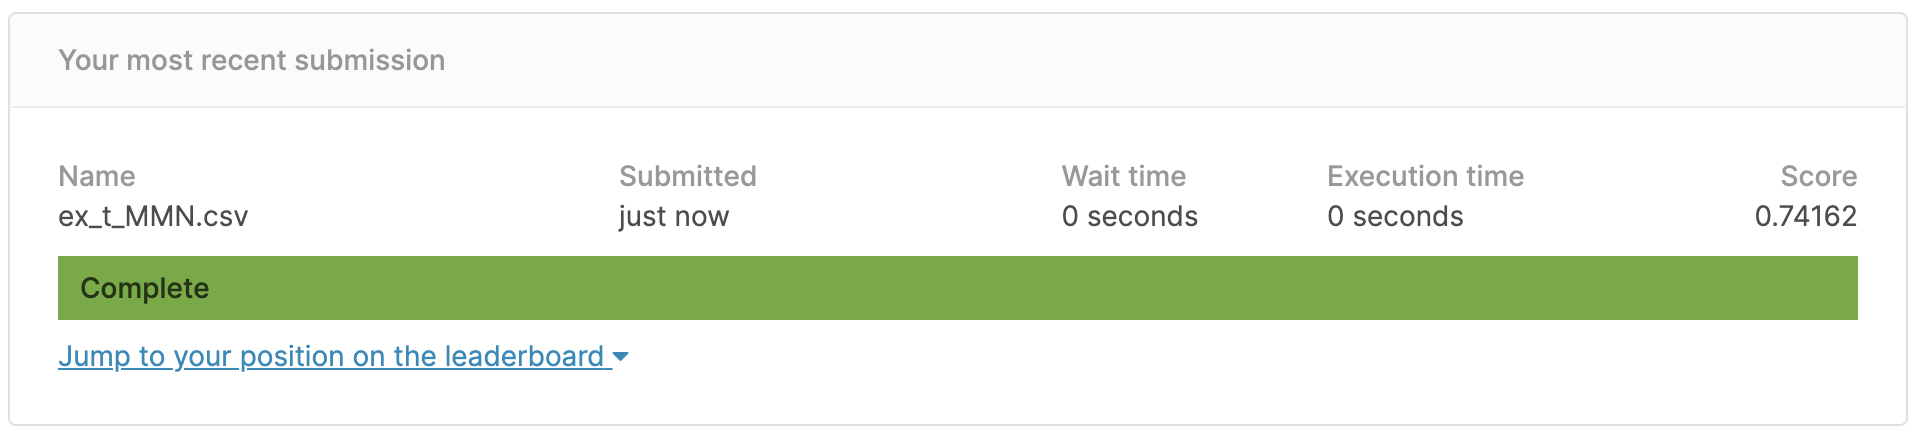

In [126]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_ex_t = cross_val_score(ex_t, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Extra Trees", "Train", s_ex_t.mean().round(3)))

Extra Trees Train Score:	0.796 


---
## Grid Search 
#### 1- Grid Search for tree classifier

In [127]:
# our grid prameters 
gdt_params = {
      'min_samples_split':[1,2,3],
     'splitter':['best','random'],
    'max_features':[2, 3, 5, 7, 8,9],
    'max_depth': [1, 2, 3, 4, 5, 8],
    'criterion':['gini', 'entropy'],
}

In [128]:
gdt=DecisionTreeClassifier()# initialize model

In [129]:
gs_dt = GridSearchCV(gdt,gdt_params,cv=5, verbose=1)# initialize GridSearch
gs_dt.fit(Xs_train_data, y_train_data)# fit GridSearch

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 8],
                         'max_features': [2, 3, 5, 7, 8, 9],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=1)

In [130]:
print('The best score' ,gs_dt.best_score_)
print('The score after GridSearch',gs_dt.score(Xs_train_data, y_train_data))
print('the best parameters :')
print( gs_dt.best_params_)


The best score 0.8226790534178645
The score after GridSearch 0.8540965207631874
the best parameters :
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 7, 'min_samples_split': 2, 'splitter': 'random'}


In [131]:
#fit train data with best model 
dt_best=gs_dt

In [132]:
#prediction for the best model in pred_dt_best on Train data
trainpred_dt_best=dt_best.predict(Xs_train_data)
#prediction for the best model in pred_dt_best on Test data
testpred_dt_best= dt_best.predict(Xs_test_data) 

In [133]:
#confusion matrix and classification reports for (best) Decision Tree Classifier for Train data
print('confusion matrix for best DT')
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpred_dt_best)
print(confusion_matrix)
print('classification report for best DT')
print(metrics.classification_report(y_train_data, trainpred_dt_best))

confusion matrix for best DT
[[528  21]
 [109 233]]
classification report for best DT
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       549
           1       0.92      0.68      0.78       342

    accuracy                           0.85       891
   macro avg       0.87      0.82      0.84       891
weighted avg       0.86      0.85      0.85       891



In [134]:
testpred_dt_best

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [135]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
best_dt_df=pd.DataFrame(testpred_dt_best,test_data['PassengerId']).reset_index()
best_dt_df.rename(columns={0:'Survived'}, inplace=True)
best_dt_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [136]:
#save the dataframe as CSV format file to submitted in kaggle
best_dt_df.to_csv('Best_dt_MMN.csv',index=False)

bestDT_score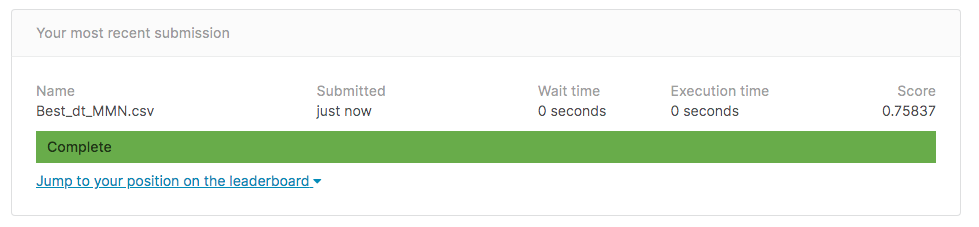

In [137]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
best_dt_CV = cross_val_score(dt_best, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best DT", "Train", best_dt_CV.mean().round(3)))

Best DT Train Score:	0.804 


#### 2- Grid Search for bagging classifier

In [138]:
# our grid prameters 
gb_params = {
    'base_estimator':[DecisionTreeClassifier(),KNeighborsClassifier()],
    'n_estimators':[10, 50, 200],
    'max_samples':[10,50,70,80],
    'max_features':[2, 3, 5, 7,8,9],
    'bootstrap':[True,False],
}

In [139]:
gb=BaggingClassifier()# initialize model

In [140]:
gs_B = GridSearchCV(gb,gb_params,cv=5, verbose=1)# initialize GridSearch
#shift+tab should be your punch pad now, right?
gs_B

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(),
                                            KNeighborsClassifier()],
                         'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7, 8, 9],
                         'max_samples': [10, 50, 70, 80],
                         'n_estimators': [10, 50, 200]},
             verbose=1)

In [141]:
gs_B.fit(Xs_train_data, y_train_data)# fit GridSearch

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(),
                                            KNeighborsClassifier()],
                         'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7, 8, 9],
                         'max_samples': [10, 50, 70, 80],
                         'n_estimators': [10, 50, 200]},
             verbose=1)

In [142]:
print('The best score' ,gs_B.best_score_)
print('The score after GridSearch',gs_B.score(Xs_train_data, y_train_data))
print('the best parameters :')
print( gs_B.best_params_)

The best score 0.827185989580064
The score after GridSearch 0.8641975308641975
the best parameters :
{'base_estimator': DecisionTreeClassifier(), 'bootstrap': True, 'max_features': 8, 'max_samples': 80, 'n_estimators': 200}


In [143]:
#fit train data with best model 
B_best=gs_B

In [144]:
#prediction for the best model in pred_dt_best on Train data
trainpred_B_best=B_best.predict(Xs_train_data)
#prediction for the best model in pred_dt_best on Test data
testpred_B_best= B_best.predict(Xs_test_data)

In [145]:
#confusion matrix and classification reports for (best) Decision Tree Classifier for Train data
print('confusion matrix for best Bagging')
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpred_B_best)
print(confusion_matrix)
print('classification report for best Bagging')
print(metrics.classification_report(y_train_data, trainpred_B_best))

confusion matrix for best Bagging
[[517  32]
 [ 89 253]]
classification report for best Bagging
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       549
           1       0.89      0.74      0.81       342

    accuracy                           0.86       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.87      0.86      0.86       891



In [146]:
testpred_B_best

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [147]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
best_B_df=pd.DataFrame(testpred_B_best,test_data['PassengerId']).reset_index()
best_B_df.rename(columns={0:'Survived'}, inplace=True)
best_B_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [148]:
#save the dataframe as CSV format file to submitted in kaggle
best_B_df.to_csv('Best_B_MMN.csv',index=False)

best_Bagg_TEstScore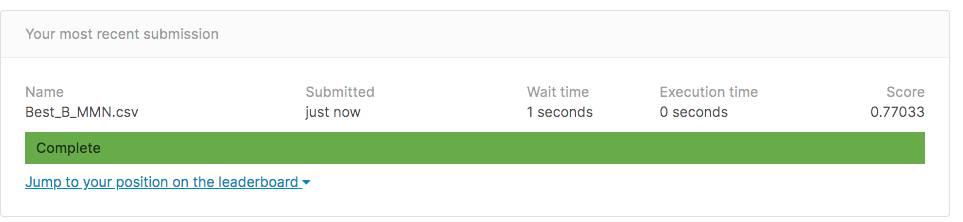

In [149]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
best_B_CV = cross_val_score(B_best, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best DT", "Train", best_B_CV.mean().round(3)))

Best DT Train Score:	0.811 


#### 3- Grid Search for Random Forest

In [150]:
# our grid prameters 
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_features':[2, 3, 5, 7, 8,9],
    'max_depth': [1, 2, 3, 4, 5, 8],
    'criterion':['gini', 'entropy'],
}

In [151]:
#inisalize Random Forest Classifier
rf_g = RandomForestClassifier() # just a new instance!

In [152]:
gs_rf = GridSearchCV(rf_g,rf_params,cv=5, verbose=1)# initialize GridSearch
gs_rf.fit(Xs_train_data, y_train_data)# fit GridSearch

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 8],
                         'max_features': [2, 3, 5, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [153]:
print('The best score' ,gs_rf.best_score_)
print('The score after GridSearch',gs_rf.score(Xs_train_data, y_train_data))
print('the best parameters :')
print( gs_rf.best_params_)

The best score 0.83841566756638
The score after GridSearch 0.9046015712682379
the best parameters :
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 7, 'n_estimators': 100}


In [154]:
#fit train data with best model 
rf_best=gs_rf

In [155]:
#prediction for the best model in pred_dt_best on Train data
trainpred_rf_best=rf_best.predict(Xs_train_data)
#prediction for the best model in pred_dt_best on Test data
testpred_rf_best= rf_best.predict(Xs_test_data)

In [156]:
#confusion matrix and classification reports for (best) Decision Tree Classifier for Train data
print('confusion matrix for best Random Forest')
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpred_rf_best)
print(confusion_matrix)
print('classification report for best Random Forest')
print(metrics.classification_report(y_train_data, trainpred_rf_best))

confusion matrix for best Random Forest
[[533  16]
 [ 69 273]]
classification report for best Random Forest
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       549
           1       0.94      0.80      0.87       342

    accuracy                           0.90       891
   macro avg       0.92      0.88      0.90       891
weighted avg       0.91      0.90      0.90       891



In [157]:
testpred_rf_best

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [158]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
best_rf_df=pd.DataFrame(testpred_rf_best,test_data['PassengerId']).reset_index()
best_rf_df.rename(columns={0:'Survived'}, inplace=True)
best_rf_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [159]:
#save the dataframe as CSV format file to submitted in kaggle
best_rf_df.to_csv('Best_rf_MMN.csv',index=False)

RF_best_testScore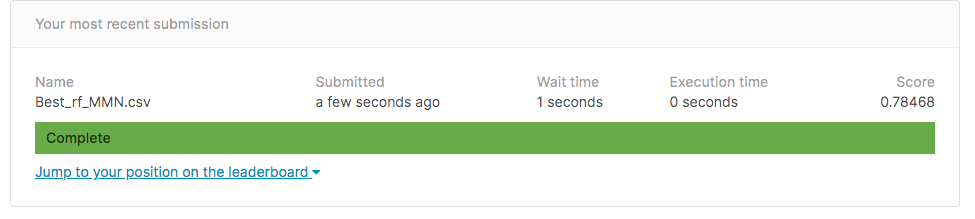

In [160]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
best_rf_CV = cross_val_score(rf_best, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best Random Forest", "Train", best_rf_CV.mean().round(3)))

Best Random Forest Train Score:	0.825 


#### 4- Grid Search for Extra Trees

In [161]:
#inisalize Extra Trees Classifier 
et_g = ExtraTreesClassifier()

In [162]:
et_gs = GridSearchCV(et_g,rf_params,cv=5, verbose=1)# initialize GridSearch
et_gs.fit(Xs_train_data, y_train_data)# fit GridSearch

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 8],
                         'max_features': [2, 3, 5, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [163]:
print('The best score' ,et_gs.best_score_)
print('The score after GridSearch',et_gs.score(Xs_train_data, y_train_data))
print('the best parameters :')
print( et_gs.best_params_)

The best score 0.8294206264515724
The score after GridSearch 0.8799102132435466
the best parameters :
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'n_estimators': 100}


In [164]:
#fit train data with best model 
et_best=et_gs

In [165]:
#prediction for the best model in pred_dt_best on Train data
trainpred_et_best=et_best.predict(Xs_train_data)
#prediction for the best model in pred_dt_best on Test data
testpred_et_best= et_best.predict(Xs_test_data)

In [166]:
#confusion matrix and classification reports for (best) Decision Tree Classifier for Train data
print('confusion matrix for best ExtraTree')
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpred_et_best)
print(confusion_matrix)
print('classification report for best ExtraTree')
print(metrics.classification_report(y_train_data, trainpred_et_best))

confusion matrix for best ExtraTree
[[536  13]
 [ 94 248]]
classification report for best ExtraTree
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       549
           1       0.95      0.73      0.82       342

    accuracy                           0.88       891
   macro avg       0.90      0.85      0.87       891
weighted avg       0.89      0.88      0.88       891



In [167]:
trainpred_et_best

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [168]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
best_et_df=pd.DataFrame(testpred_et_best,test_data['PassengerId']).reset_index()
best_et_df.rename(columns={0:'Survived'}, inplace=True)
best_et_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [169]:
#save the dataframe as CSV format file to submitted in kaggle
best_et_df.to_csv('Best_et_MMN.csv',index=False)

Et_best_testScore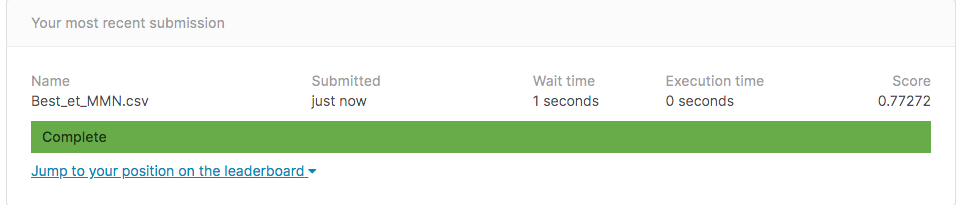

In [170]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
best_et_CV = cross_val_score(et_best, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best ExtraTree", "Train", best_et_CV.mean().round(3)))

Best ExtraTree Train Score:	0.823 


#### 5- Grid Search for knn

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# identify the parmeter grid for knn
param_grid = {
    'n_neighbors': [2,3, 5, 7, 9, 11, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

In [82]:
# insillize the knn model , grid_search 
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, 
                  param_grid, 
                  cv=5,
                  scoring='roc_auc',
                  verbose=0)

knn_gs.fit(Xs_train_data, y_train_data)# fit GridSearch

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 20],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [83]:
knn_gs.best_estimator_ #select the best estimator in knn

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [84]:
knn_gs.best_params_ #select the best prameter

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [85]:
knn_gs.best_score_ #select the best score of knn using Grid_search

0.8643515909464196

In [86]:
knn_gs_predictions_train = knn_gs.predict(Xs_train_data)# do prediction on train data
knn_gs_predictions_test = knn_gs.predict(Xs_test_data) # do prediction on test data

In [87]:
knn_gs_train_score=knn_gs.score(Xs_train_data, y_train_data) #get the score of train data
print('Knn with grid-Search score in train= ',knn_gs_train_score)

Knn with grid-Search score in train=  0.916514875531269


In [88]:
#confusion matrix and classification reports for (best) Decision Tree Classifier for Train data
confusion_matrix = metrics.confusion_matrix(y_train_data, knn_gs_predictions_train) # display the cofusion_matrix
print(confusion_matrix)

[[499  50]
 [ 83 259]]


In [180]:
print(metrics.classification_report(y_train_data, knn_gs_predictions_train))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       549
           1       0.84      0.76      0.80       342

    accuracy                           0.85       891
   macro avg       0.85      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891



In [181]:
knn_gs_predictions_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [182]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
knn_gs_df=pd.DataFrame(knn_gs_predictions_test,test_data['PassengerId']).reset_index()
knn_gs_df.rename(columns={0:'Survived'}, inplace=True)
knn_gs_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [183]:
#save the dataframe as CSV format file to submitted in kaggle
knn_gs_df.to_csv('knn_gs_MMN.csv',index=False)

knn_gs_test_score.PNG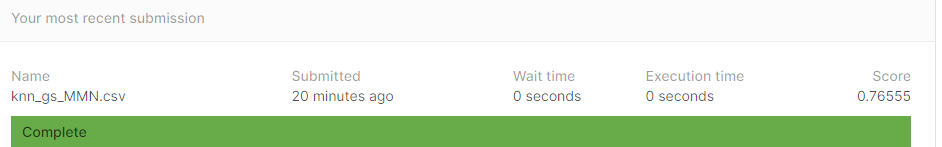

In [90]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
knn_gs_CV = cross_val_score(knn_gs, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best KNN", "Train", knn_gs_CV.mean().round(3)))

Best KNN Train Score:	0.857 


#### 6- Grid Search for logistic Regression

In [91]:
gs={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} ## identify the parmeter grid for logistic Regression
lr=LogisticRegression()#initialize model
lr_gs=GridSearchCV(lr,gs,cv=10)# initialize GridSearch
lr_gs.fit(Xs_train_data,y_train_data)#fit GridSearch


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [92]:
lr_gs.best_params_ #select the best prameter

{'C': 0.01, 'penalty': 'l2'}

In [93]:
lr_gs.best_estimator_ #select the best estimator

LogisticRegression(C=0.01)

In [94]:
lr_gs.best_score_#select the best score

0.8024843945068664

In [189]:
lr_gs_predictions_train = lr_gs.predict(Xs_train_data)# do prediction on train data
lr_gs_predictions_test = lr_gs.predict(Xs_test_data)# do prediction on test data

In [95]:
#comput and print score on train dataset
lr_gs_train_score=lr_gs.score(Xs_train_data, y_train_data)
print('Logistic regression with grid-Search score in train= ',lr_gs_train_score)

Logistic regression with grid-Search score in train=  0.8125701459034792


In [191]:
#confusion matrix and classification reports for (best) Decision Tree Classifier for Train data
confusion_matrix = metrics.confusion_matrix(y_train_data, lr_gs_predictions_train)
print(confusion_matrix)

[[494  55]
 [112 230]]


In [192]:
print(metrics.classification_report(y_train_data, lr_gs_predictions_train))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       549
           1       0.81      0.67      0.73       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [193]:
lr_gs_predictions_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [197]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
lr_gs_df=pd.DataFrame(lr_gs_predictions_test,test_data['PassengerId']).reset_index()
lr_gs_df.rename(columns={0:'Survived'}, inplace=True)
lr_gs_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [195]:
#save the dataframe as CSV format file to submitted in kaggle
lr_gs_df.to_csv('lr_gs_MMN.csv',index=False)

lr_gs_test_score.PNG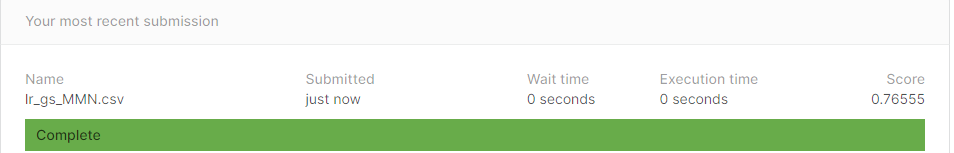

In [98]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
lr_gs_CV = cross_val_score(lr_gs, Xs_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best logistic Regression", "Train" , lr_gs_CV.mean().round(3)))

Best logistic Regression Train Score:	0.795 


---

## Conclusion

In [99]:
# we did a dataframe named 'model_df' that conclude the result of each model to make easy comparing between them
model_Table = {'Model':  ['Logistic-Regression', 'Knn-Classifier','Decision-Tree','Bagging-KNNclassifier',
                          'Bagging-DessionTreeclassifier',
                          'Random-Forest','Extra-Trees',
                         'Logistic-Regression_withGS', 'Knn-Classifier_withGS','Decision-Tree_withGS','Bagging-classifier_withGS',
                          'Random-Forest_withGS','Extra-Trees_withGS'],
               'Train_Score': [0.8035, 0.866,0.8271,0.8754,0.9741,0.9809,0.9809,0.8125,0.9165,0.8549,0.8641,0.9046,0.8799],
               'Test_Score': [0.7655,0.7511,0.7751,0.7559,0.7488,0.7535,0.7416, 0.7655,0.7655 , 0.7583,0.7703,0.7846,0.7727],
               'Train_Cross_Validation_Score': [0.797,0.811,0.807,0.802,0.817,0.811,0.796,0.795,0.857,0.804,0.811,0.825,0.823]
               }

model_df = pd.DataFrame (model_Table, columns = ['Model','Train_Score','Test_Score','Train_Cross_Validation_Score'])

model_df.head(13)
#print(model_df)

,Model,Train_Score,Test_Score,Train_Cross_Validation_Score
0,Logistic-Regression,0.8035,0.7655,0.797
1,Knn-Classifier,0.8660,0.7511,0.811
2,Decision-Tree,0.8271,0.7751,0.807
3,Bagging-KNNclassifier,0.8754,0.7559,0.802
4,Bagging-DessionTreeclassifier,0.9741,0.7488,0.817
5,Random-Forest,0.9809,0.7535,0.811
6,Extra-Trees,0.9809,0.7416,0.796
7,Logistic-Regression_withGS,0.8125,0.7655,0.795
8,Knn-Classifier_withGS,0.9165,0.7655,0.857
9,Decision-Tree_withGS,0.8549,0.7583,0.804


**Above table summarize the scores of each model that we used with our dataset**

We obserived that the best score we got in test score is '0.7723'. We reached this score by using `Random-Forest` with `Grid Search`.

In Fact, we note that all our models optimized when using `Grid Search`.
In addition, this score as we learn in our couse is very good and it indicates that the model did prefectly because if the score nearly to 9 or 1 that mean it has overfit and if the score under 6 or 5 that means the model has bias. So, we got score in the safe and excellent way.